# Lab 7- Data Analysis

In this lab, you download and begin to look at a particle physics dataset. You must download the dataset by March 17th. Exercises 1-4 are to be completed by March 21th. The remaider of the lab is due March 29th. Before leaving lab today, I suggest everyone downloads the dataset.

## Exercise 1: Reading

### HiggsML
In 2014, some of my colleagues from the ATLAS experiment put together a Higgs Machine Learning Challenge, which was hosted on [Kaggle](https://www.kaggle.com). Please read sections 1 and 3 (skip/skim 2) of [The HiggsML Technical Documentation](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf). 

Kaggle is a platform for data science competitions, with cash awards for winners. Kaggle currently hosts over 50,000 public datasets and associated competitions. Later in the course we will look at a variety of problems hosted on Kaggle and similar platforms. 

### SUSY Dataset

For the next few labs we will use datasets used in the [first paper on Deep Learning in High Energy physics](https://arxiv.org/pdf/1402.4735.pdf). Please read up to the "Deep Learning" section (end of page 5). This paper demonstrates that Deep Neural Networks can learn from raw data the features that are typically used by physicists for searches for exotics particles. The authors provide the data they used for this paper. They considered two benchmark scenarios: Higgs and SUSY.

## Exercise 2: Download SUSY Dataset

The information about the dataset can be found at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). We'll start with the [SUSY Dataset](https://archive.ics.uci.edu/ml/datasets/SUSY). 

### Download
In a terminal, download the data directly from the source and then decompress it. For example:

* To download:
    * On Mac OS: 
    `curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz`

    * In linux:
    `wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz`

* To uncompress:
`gunzip SUSY.csv.gz`

In [1]:
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  879M    0  879M    0     0  8745k      0 --:--:--  0:01:42 --:--:-- 5070k --:--:--  0:00:14 --:--:-- 4725k38M    0     0  7788k      0 --:--:--  0:00:18 --:--:-- 7214k85M    0     0  8056k      0 --:--:--  0:00:36 --:--:--  9.9M   0     0  8224k      0 --:--:--  0:00:45 --:--:-- 9122kM    0     0  8303k      0 --:--:--  0:00:57 --:--:-- 5807k


In [2]:
!rm SUSY.csv

rm: SUSY.csv: No such file or directory


In [3]:
!gunzip SUSY.csv.gz

In [4]:
ls -lh

total 4697944
-rw-r--r--  1 ahnafmahiat  staff    18K Apr 30 13:56 Lab.7.ipynb
-rw-r--r--@ 1 ahnafmahiat  staff   5.8M Apr  2 14:22 Lab.7.pdf
-rw-r--r--  1 ahnafmahiat  staff   2.2G Apr 30 13:56 SUSY.csv


The data is provided as a comma separated file.

In [5]:
filename="SUSY.csv"
# print out the first 5 lines using unix head command
!head -5  "SUSY.csv"

0.000000000000000000e+00,9.728614687919616699e-01,6.538545489311218262e-01,1.176224589347839355e+00,1.157156467437744141e+00,-1.739873170852661133e+00,-8.743090629577636719e-01,5.677649974822998047e-01,-1.750000417232513428e-01,8.100607395172119141e-01,-2.525521218776702881e-01,1.921887040138244629e+00,8.896374106407165527e-01,4.107718467712402344e-01,1.145620822906494141e+00,1.932632088661193848e+00,9.944640994071960449e-01,1.367815494537353516e+00,4.071449860930442810e-02
1.000000000000000000e+00,1.667973041534423828e+00,6.419061869382858276e-02,-1.225171446800231934e+00,5.061022043228149414e-01,-3.389389812946319580e-01,1.672542810440063477e+00,3.475464344024658203e+00,-1.219136357307434082e+00,1.295456290245056152e-02,3.775173664093017578e+00,1.045977115631103516e+00,5.680512785911560059e-01,4.819284379482269287e-01,0.000000000000000000e+00,4.484102725982666016e-01,2.053557634353637695e-01,1.321893453598022461e+00,3.775840103626251221e-01
1.000000000000000000e+00,4.4483992457389831

## Reducing the dataset

This is a rather large dataset. If you have trouble loading it, we can easily make a new file with less data.

Here we look at the size of the data

In [6]:
!ls -lh

total 4697944
-rw-r--r--  1 ahnafmahiat  staff    18K Apr 30 13:56 Lab.7.ipynb
-rw-r--r--@ 1 ahnafmahiat  staff   5.8M Apr  2 14:22 Lab.7.pdf
-rw-r--r--  1 ahnafmahiat  staff   2.2G Apr 30 13:56 SUSY.csv


We see that we have 5 million datapoints.

In [7]:
!wc -l SUSY.csv

 5000000 SUSY.csv


We create a new file of the first half million. This is sufficient for our needs in this lab:

In [8]:
!head -500000 SUSY.csv > SUSY-small.csv

In [9]:
ls -lh

total 5164800
-rw-r--r--  1 ahnafmahiat  staff    18K Apr 30 13:56 Lab.7.ipynb
-rw-r--r--@ 1 ahnafmahiat  staff   5.8M Apr  2 14:22 Lab.7.pdf
-rw-r--r--  1 ahnafmahiat  staff   228M Apr 30 13:56 SUSY-small.csv
-rw-r--r--  1 ahnafmahiat  staff   2.2G Apr 30 13:56 SUSY.csv


In [10]:
! wc -l SUSY-small.csv

  500000 SUSY-small.csv


Use this file for the rest of the lab to make this run faster.

### First Look

Each row represents a LHC collision event. Each column contains some observable from that event. The variable names are ([based on documentation](https://archive.ics.uci.edu/ml/datasets/SUSY)):

In [11]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

Some of these variables represent the "raw" kinematics of the observed final state particles, while others are "features" that are derived from these raw quantities:

In [12]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

In [13]:
RawNames

['l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi']

In [14]:
FeatureNames

['M_Delta_R',
 'S_R',
 'axial_MET',
 'MET_rel',
 'MT2',
 'M_TR_2',
 'cos_theta_r1',
 'dPhi_r_b',
 'M_R',
 'R']

We will use pandas to read in the file, and matplotlib to make plots. The following ensures pandas is installed and sets everything up:

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now we can read the data into a pandas dataframe:

In [16]:
filename = "SUSY.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)

You can see the data in Jupyter by just evaluateing the dataframe:

In [17]:
df

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,1.0,0.853325,-0.961783,-1.487277,0.678190,0.493580,1.647969,1.843867,0.276954,1.025105,-1.486535,0.892879,1.684429,1.674084,3.366298,1.046707,2.646649,1.389226,0.364599
4999996,0.0,0.951581,0.139370,1.436884,0.880440,-0.351948,-0.740852,0.290863,-0.732360,0.001360,0.257738,0.802871,0.545319,0.602730,0.002998,0.748959,0.401166,0.443471,0.239953
4999997,0.0,0.840389,1.419162,-1.218766,1.195631,1.695645,0.663756,0.490888,-0.509186,0.704289,0.045744,0.825015,0.723530,0.778236,0.752942,0.838953,0.614048,1.210595,0.026692
4999998,1.0,1.784218,-0.833565,-0.560091,0.953342,-0.688969,-1.428233,2.660703,-0.861344,2.116892,2.906151,1.232334,0.952444,0.685846,0.000000,0.781874,0.676003,1.197807,0.093689


The first column stores the "truth" label of whether an event was signal or not. Pandas makes it easy to create dataframes that store only the signal or background events:

In [18]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

The following example plots the signal and background distributions of every variable. Note that we use VarNames[1:] to skip the first variable, which was the true label.

l_1_pT


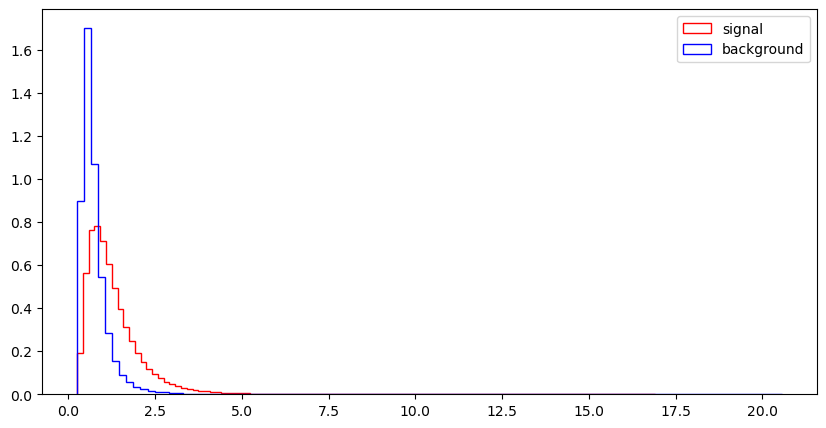

l_1_eta


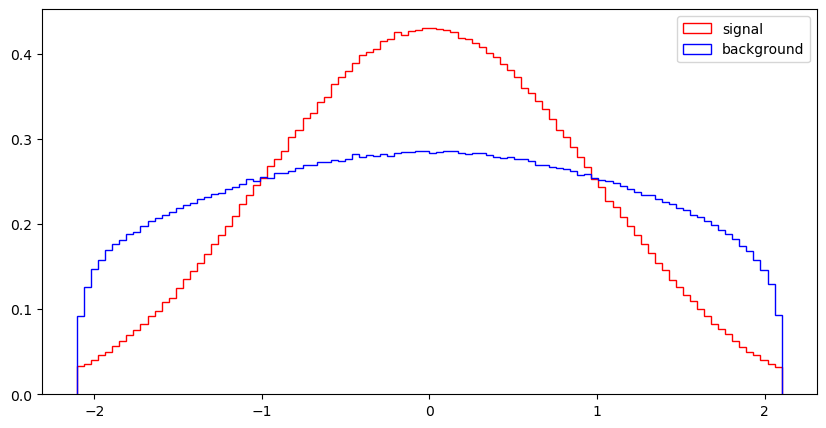

l_1_phi


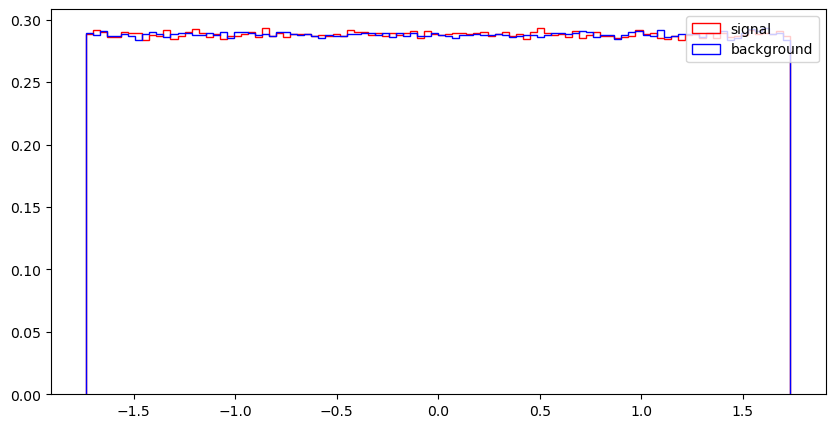

l_2_pT


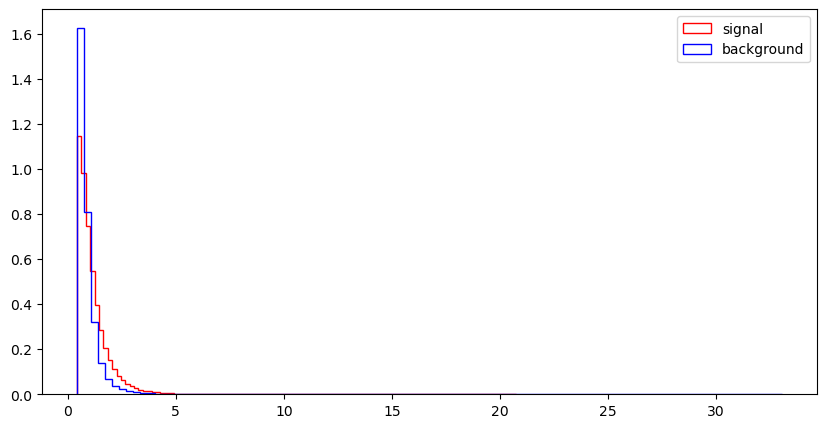

l_2_eta


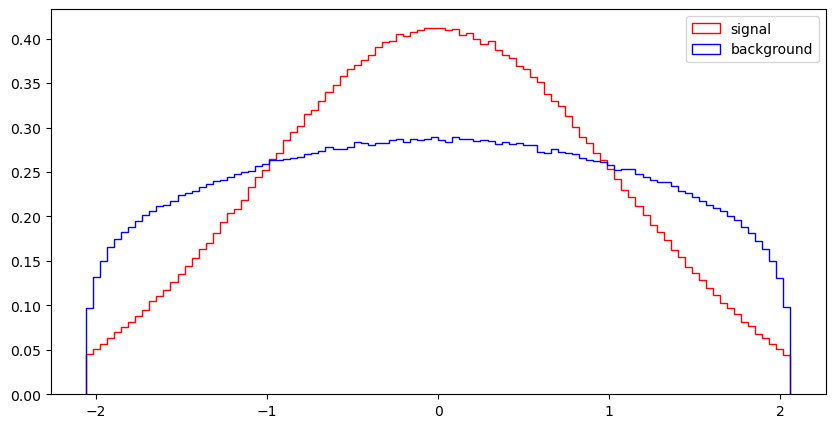

l_2_phi


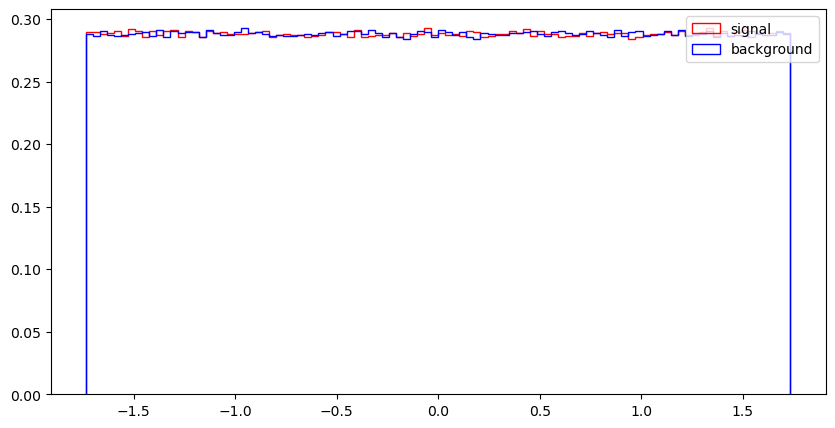

MET


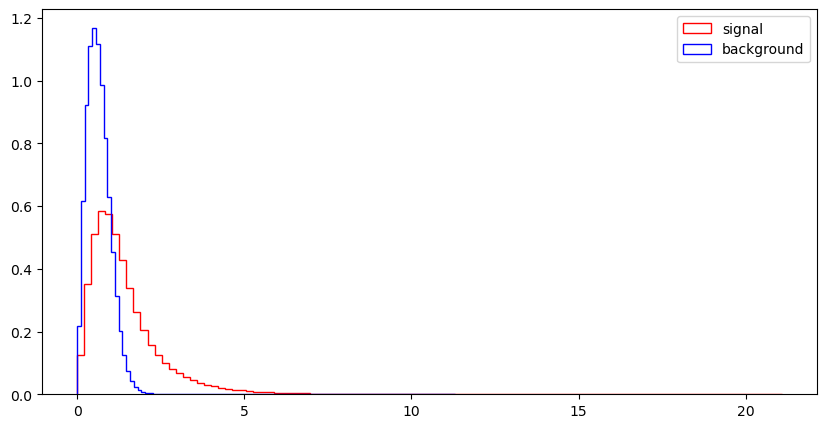

MET_phi


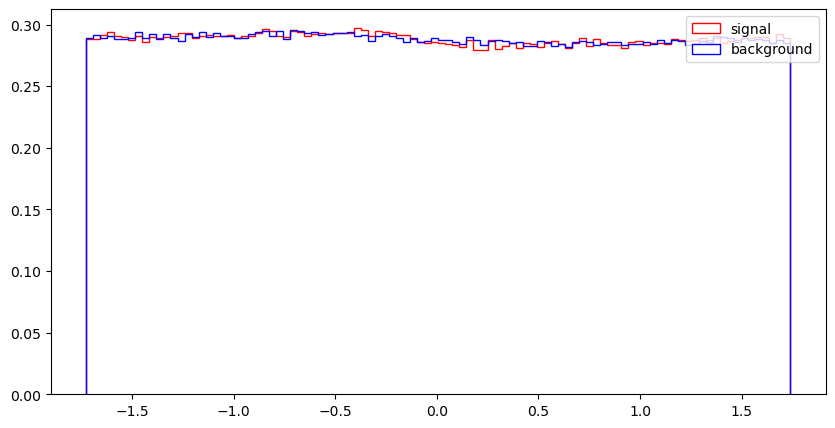

MET_rel


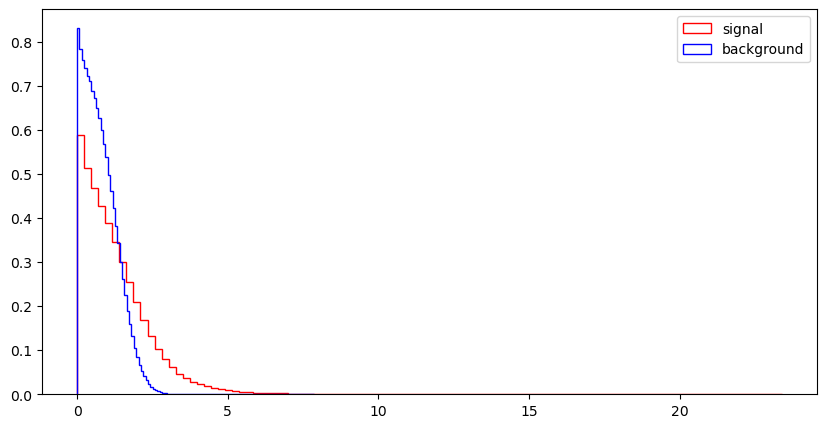

axial_MET


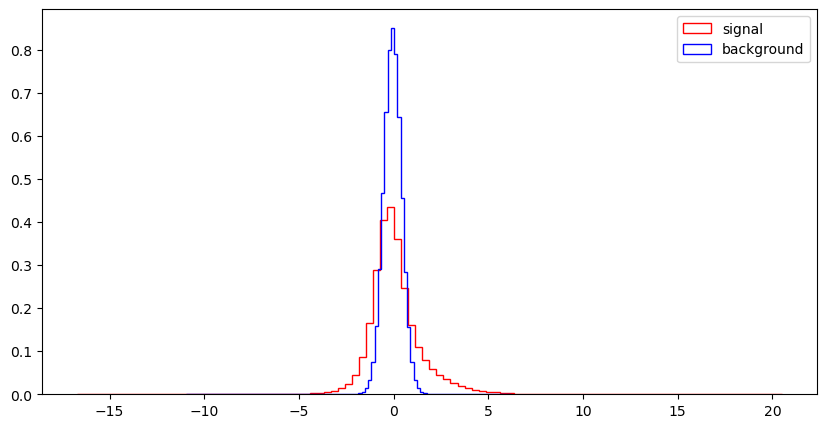

M_R


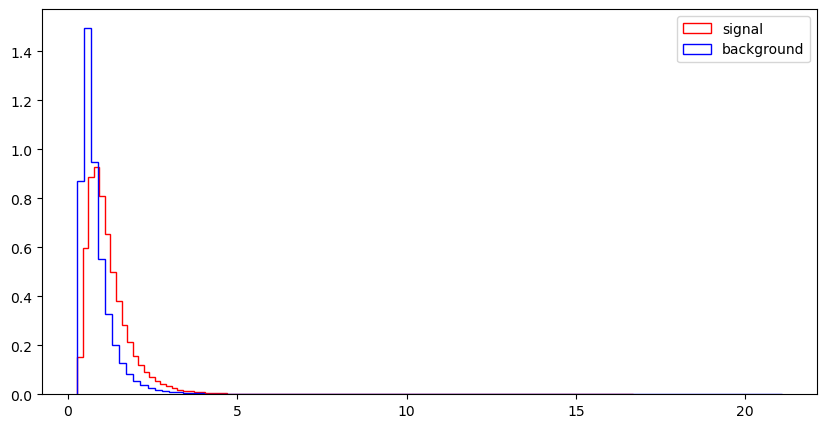

M_TR_2


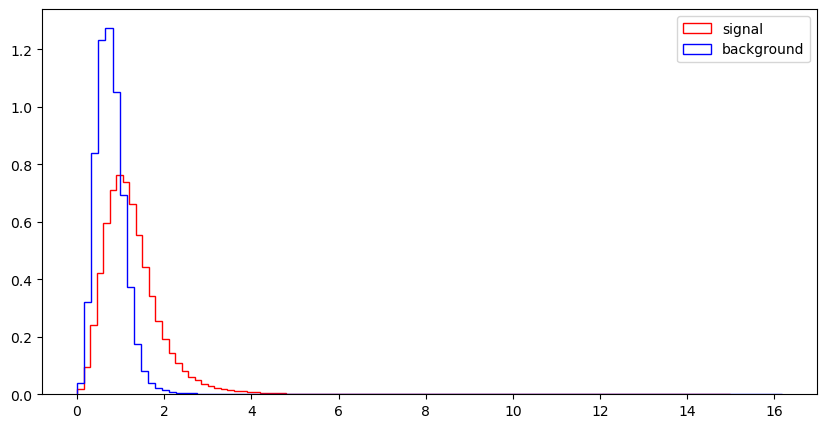

R


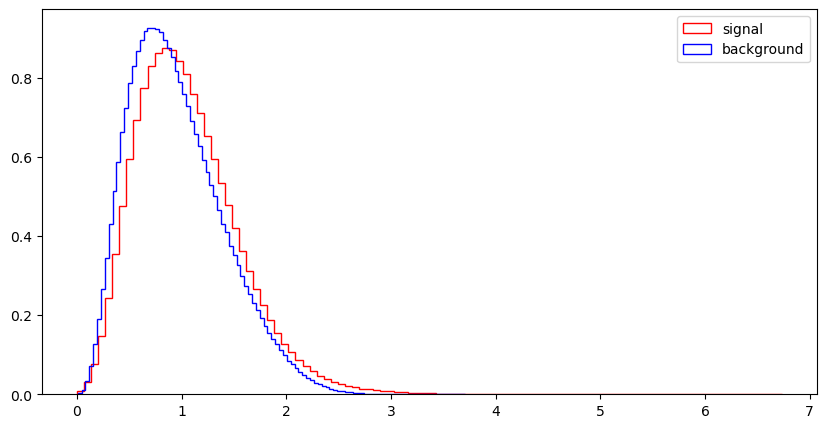

MT2


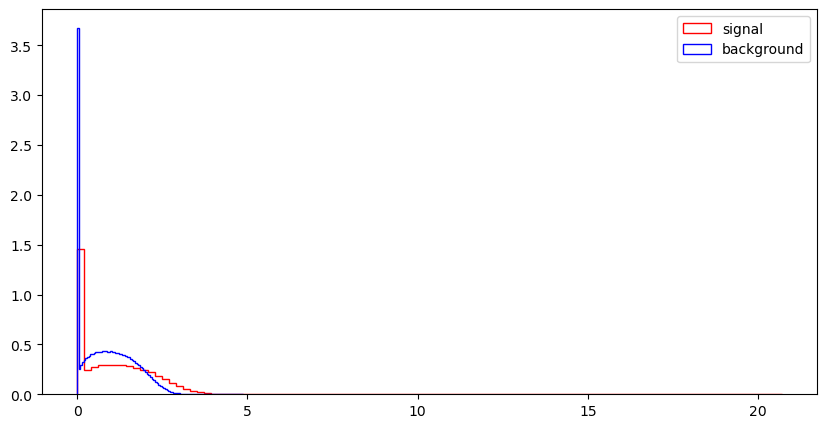

S_R


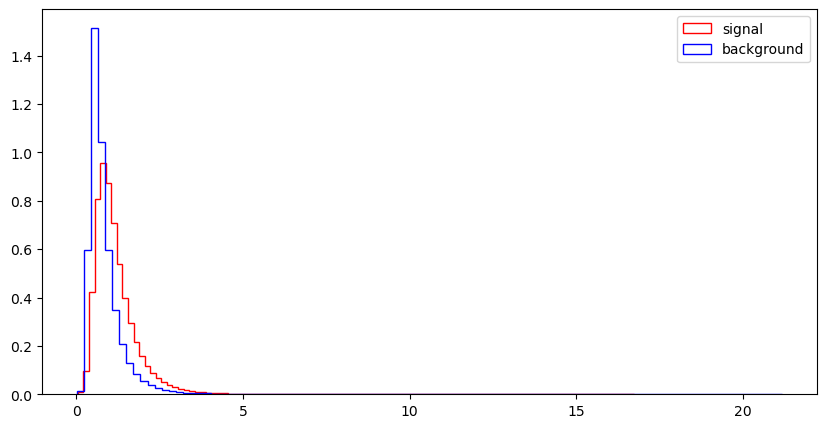

M_Delta_R


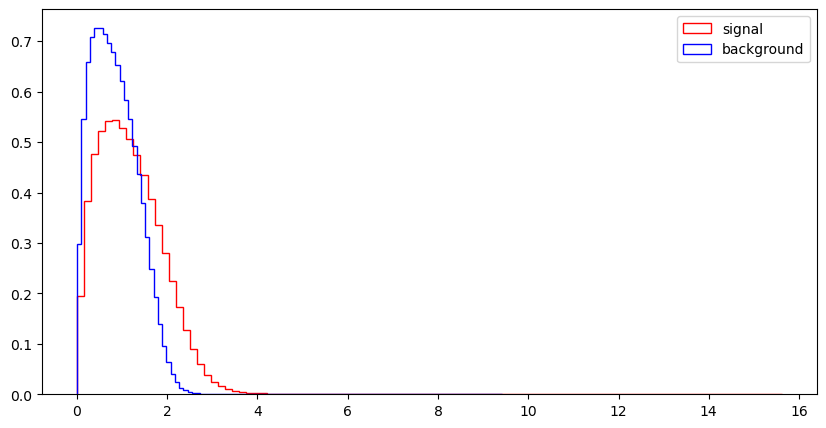

dPhi_r_b


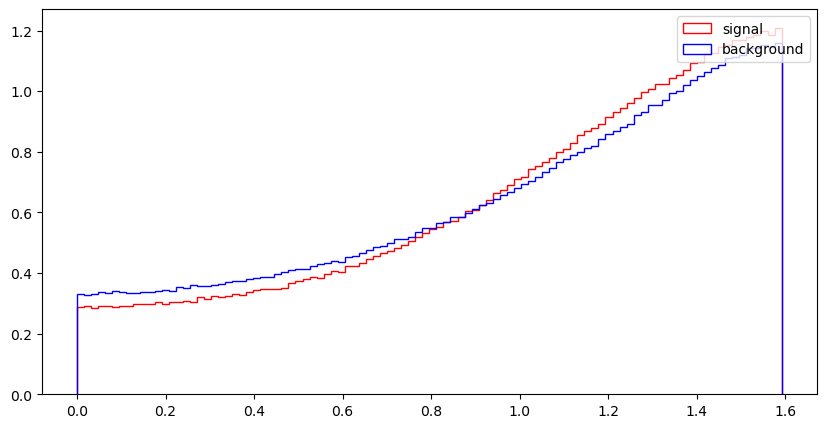

cos_theta_r1


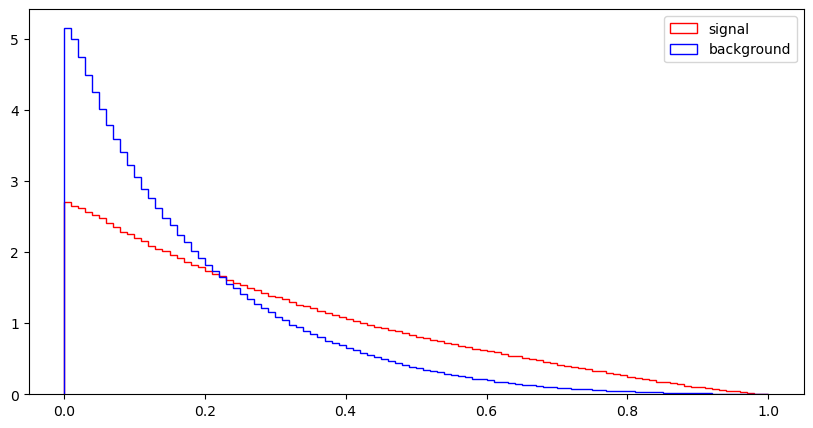

In [19]:
import numpy as np
for var in VarNames[1:]:
    print (var)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

## Exercise 3: Make nice figures

Now use `matplotlib` to reproduce as closely as you can figures 5 and 6 from the paper. This exercise is intended to get you to familiarize yourself with making nicely formatted `matplotlib` figures with multiple plots. Note that the plots in the paper are actually wrong!

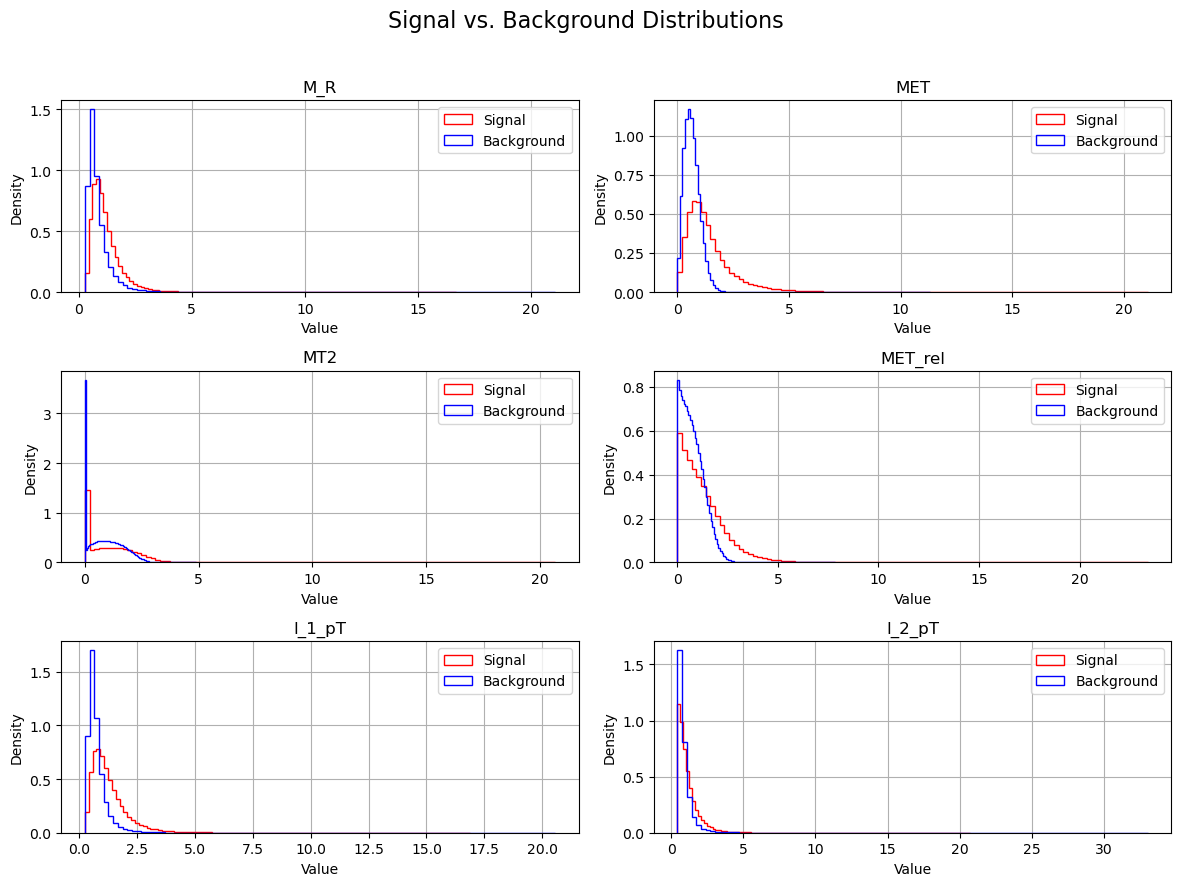

In [20]:
import matplotlib.pyplot as plt

# Choose a few representative variables for a cleaner figure
vars_to_plot = ["M_R", "MET", "MT2", "MET_rel", "l_1_pT", "l_2_pT"]

ncols = 2
nrows = (len(vars_to_plot) + 1) // ncols
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 3 * nrows))

axes = axes.flatten()
for i, var in enumerate(vars_to_plot):
    ax = axes[i]
    ax.hist(df_sig[var], bins=100, density=True, histtype='step', color='red', label='Signal')
    ax.hist(df_bkg[var], bins=100, density=True, histtype='step', color='blue', label='Background')
    ax.set_title(var)
    ax.set_xlabel("Value")
    ax.set_ylabel("Density")
    ax.legend()
    ax.grid(True)

# Hide any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Signal vs. Background Distributions", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Exercise 4: Correlation

### Exercise 4.1

#### Part a
Write a function that creates pair plots and use it to compare variables in the SUSY sample, separately for low and high-level features. Refer to Lecture 13 for details. Do not use `seaborn`.

#### Part b
Making these plots can be slow because creating each plot initiates a full loop over the data. Make at least one modification to your function in part a to speed it up. Can you propose a different method of creating histograms that would speed up making such pair plots?

#### Part c
Which observables appear to be best for separating signal from background?

 Pair plot - Raw Features


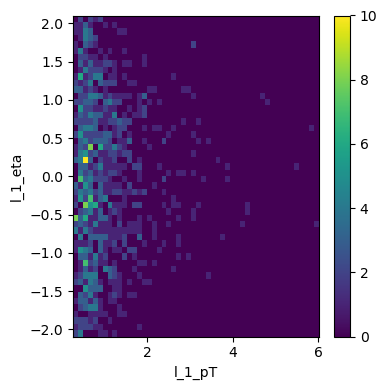

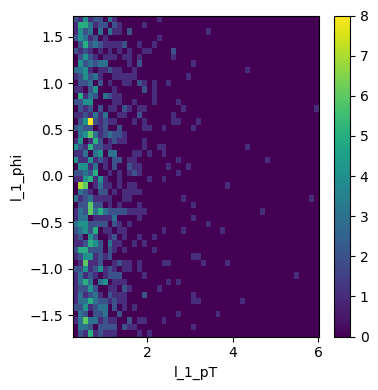

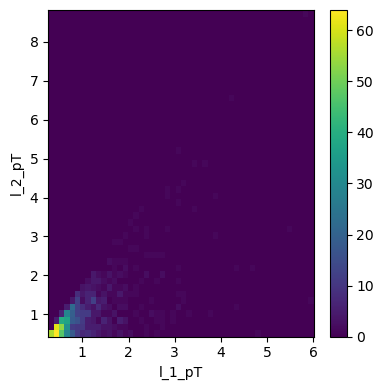

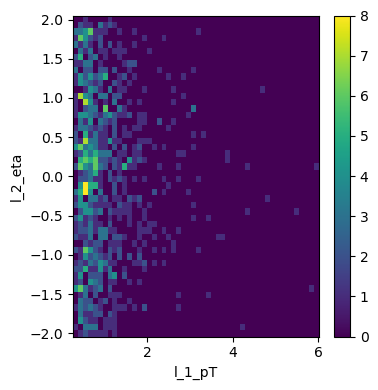

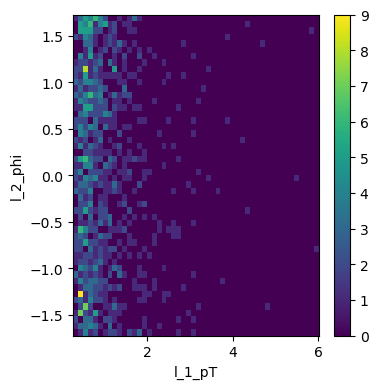

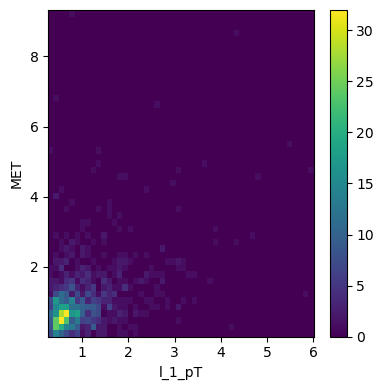

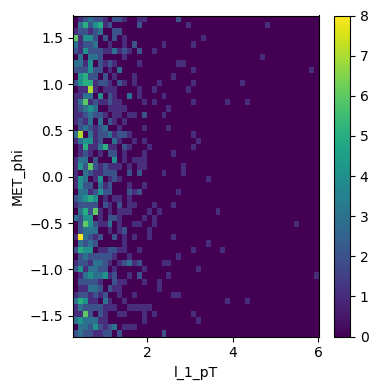

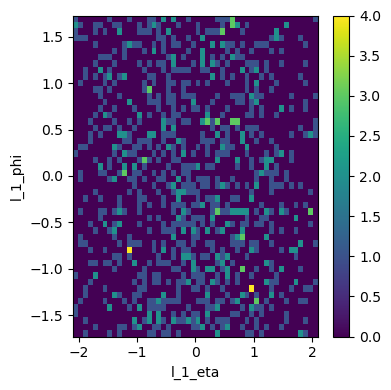

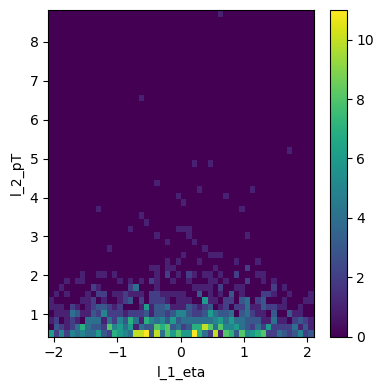

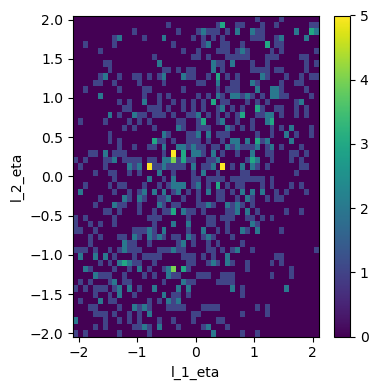

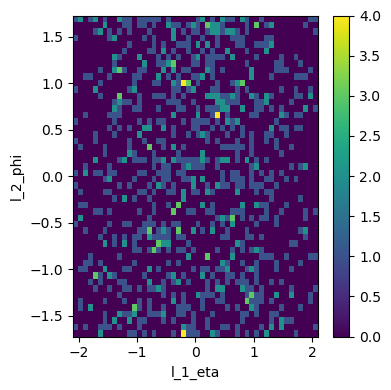

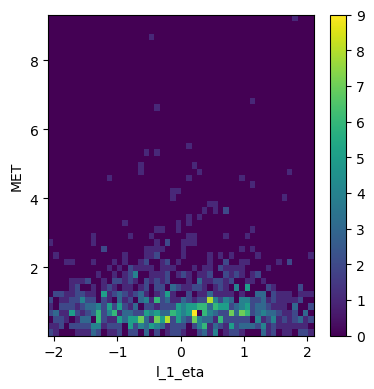

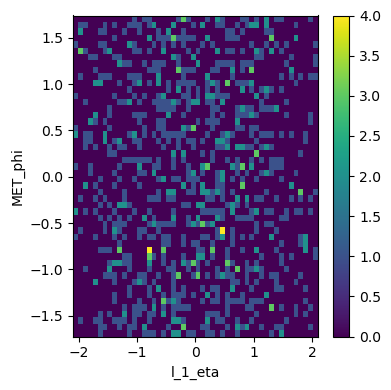

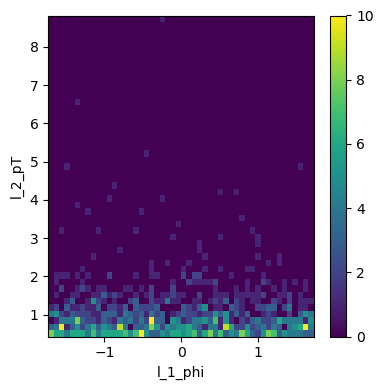

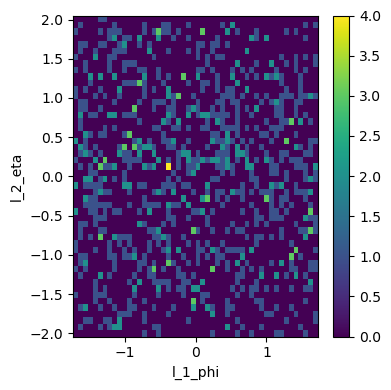

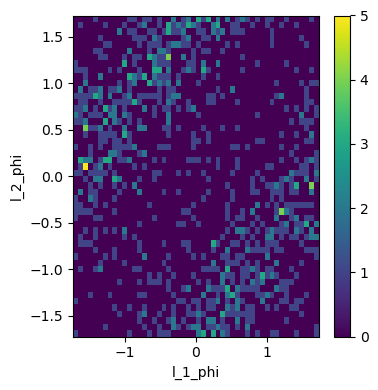

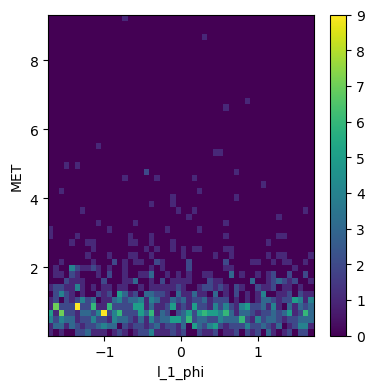

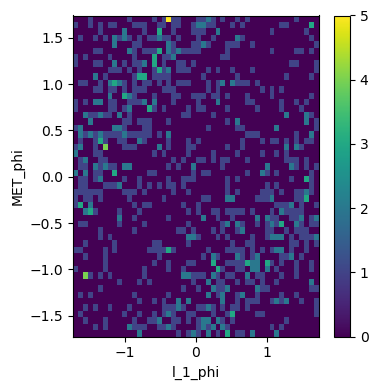

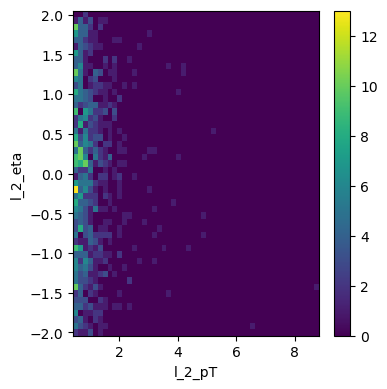

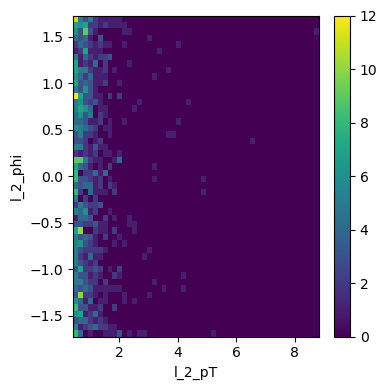

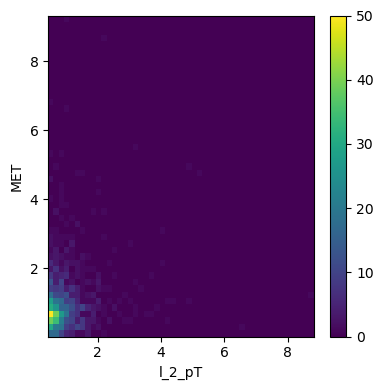

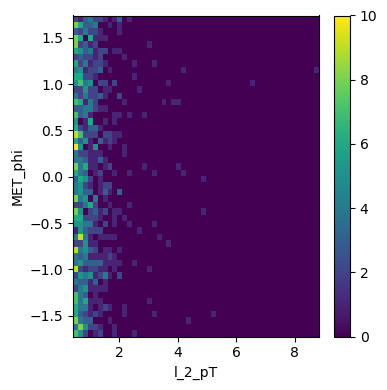

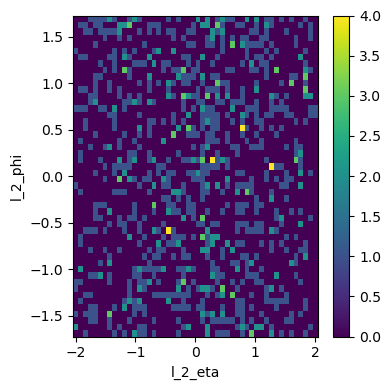

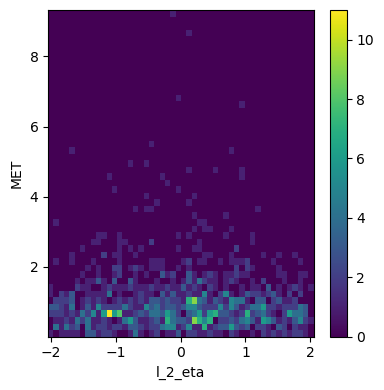

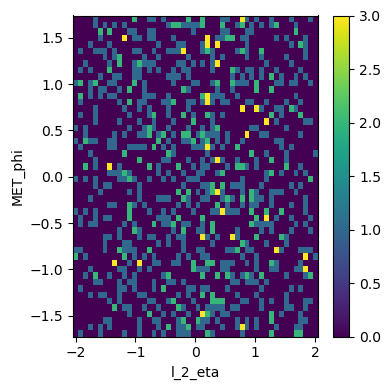

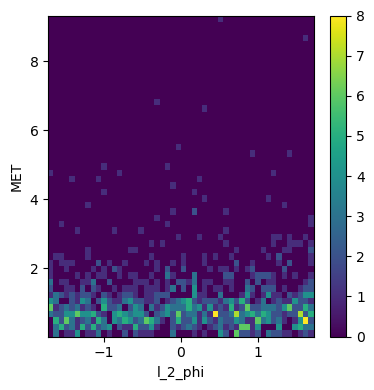

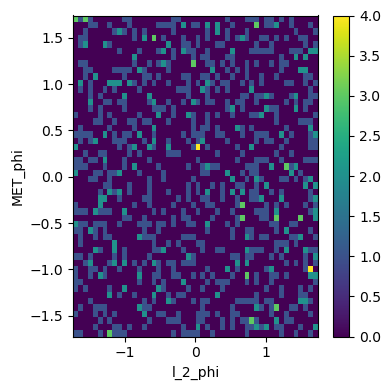

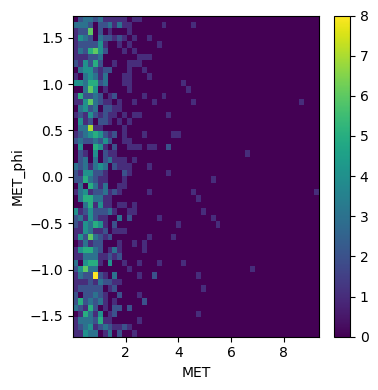

 Pair plot - Derived Features


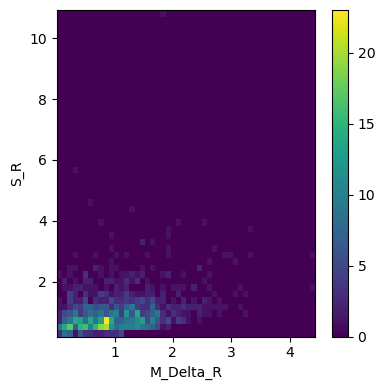

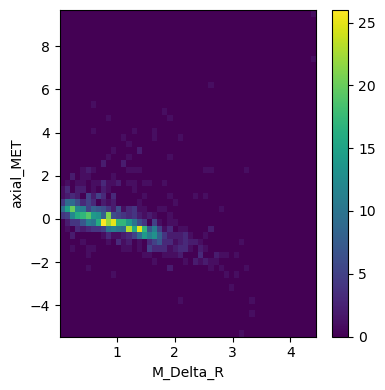

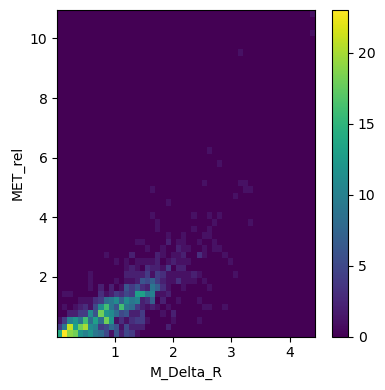

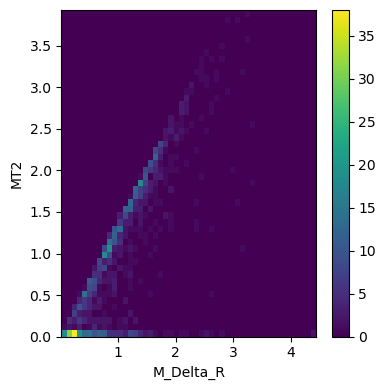

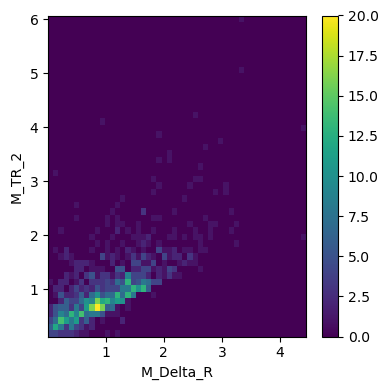

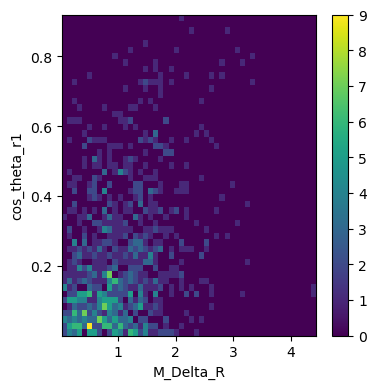

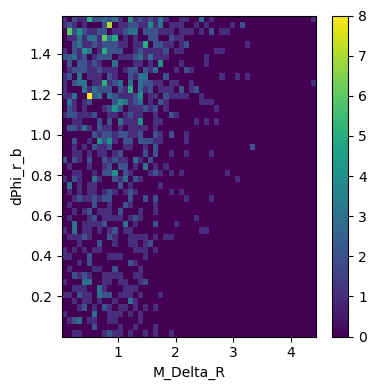

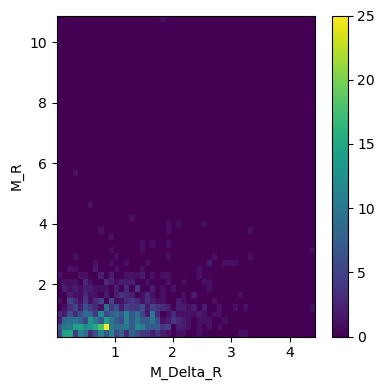

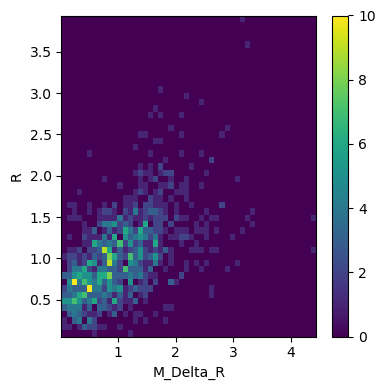

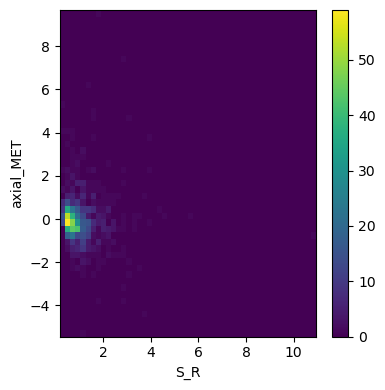

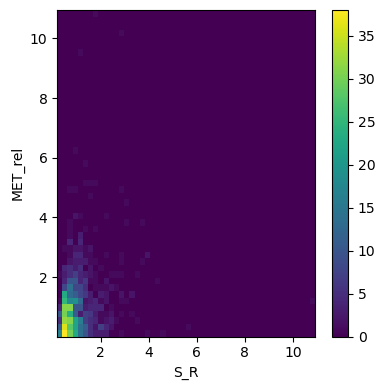

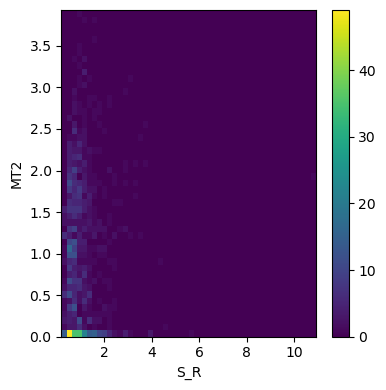

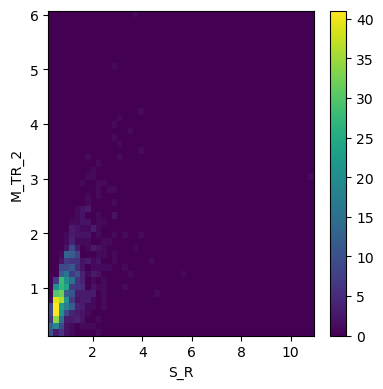

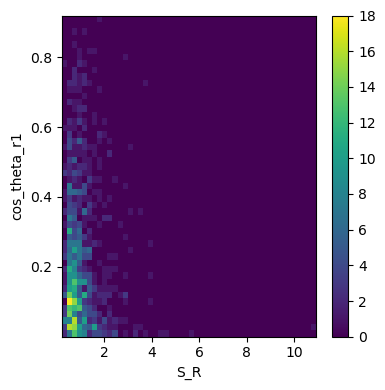

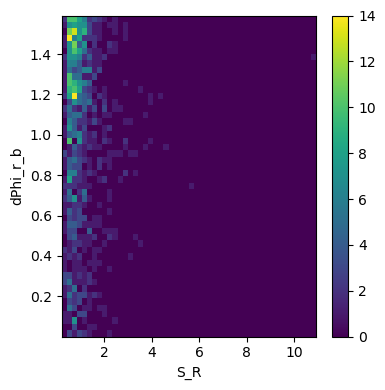

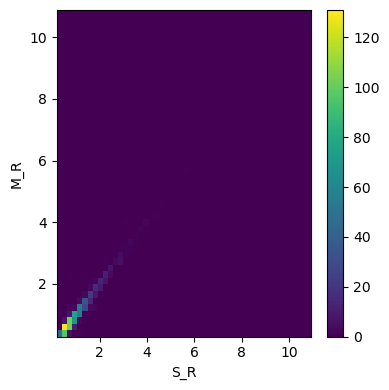

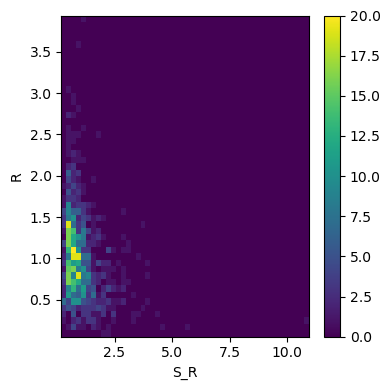

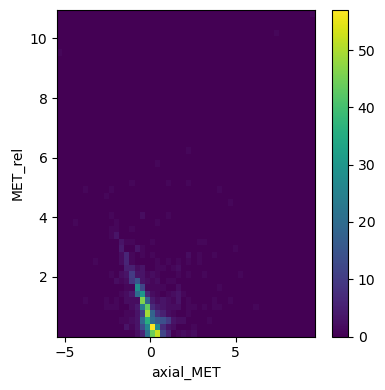

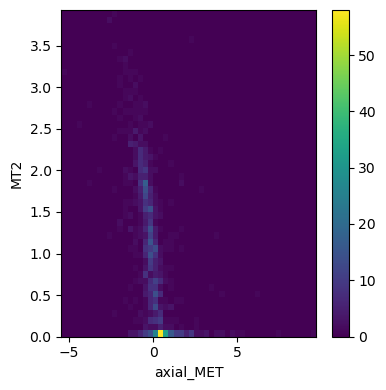

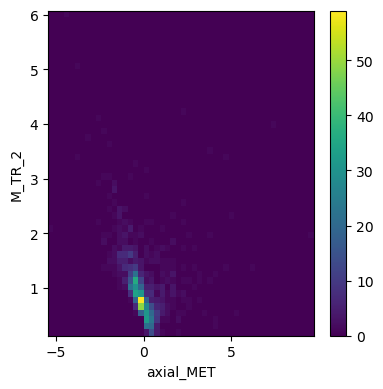

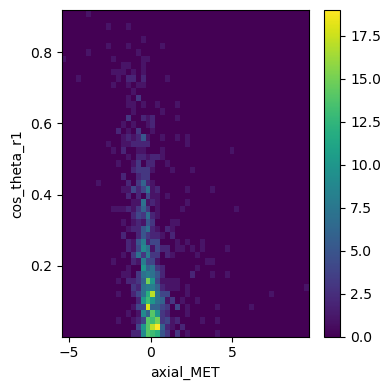

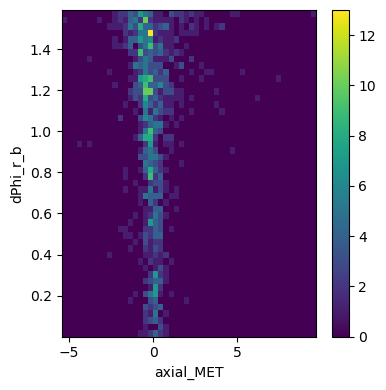

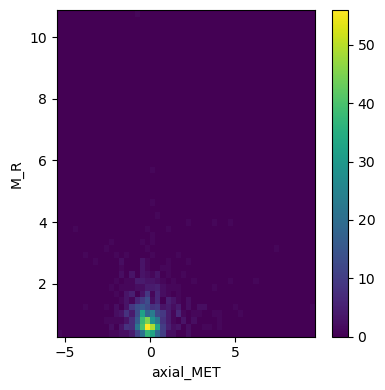

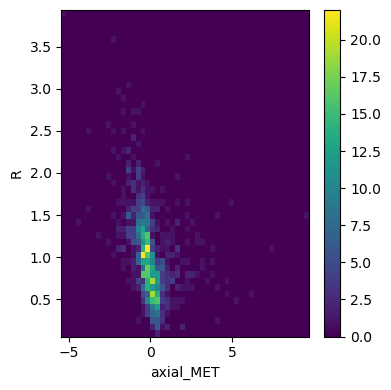

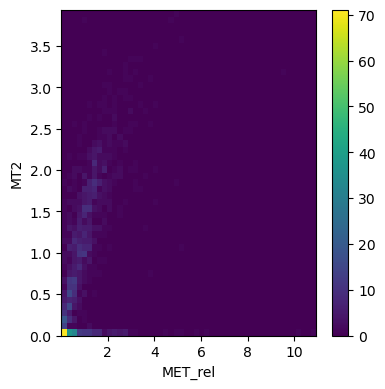

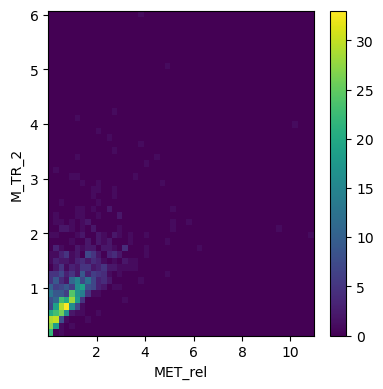

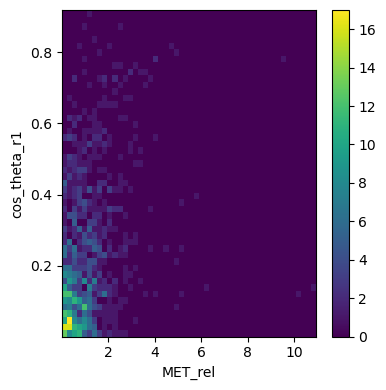

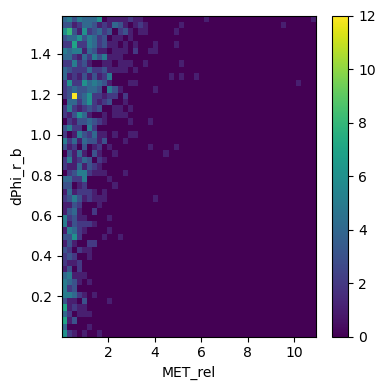

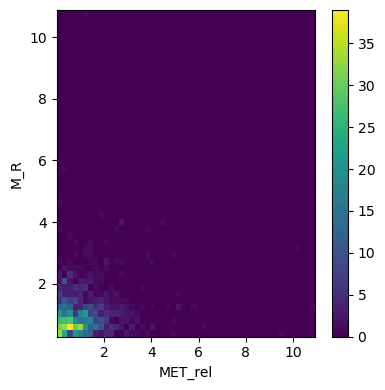

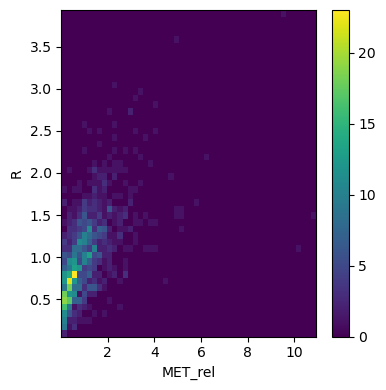

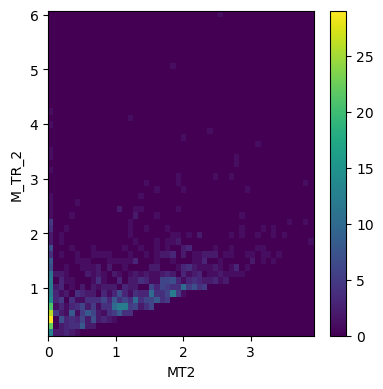

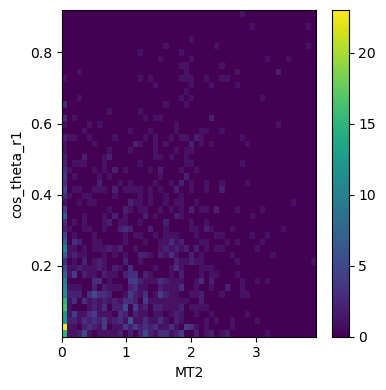

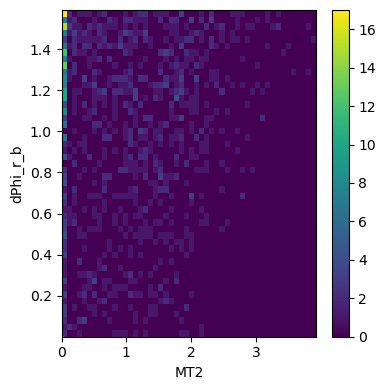

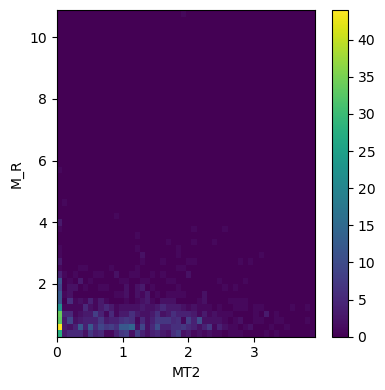

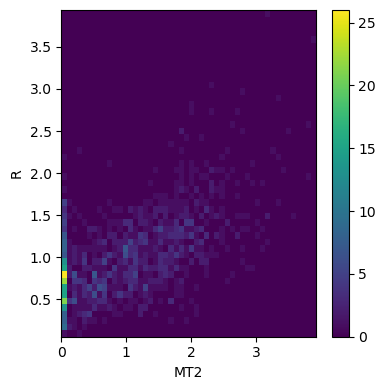

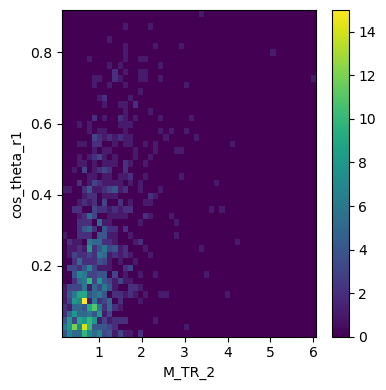

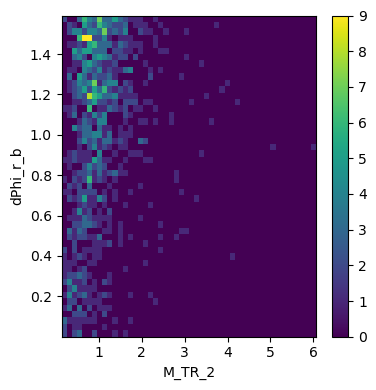

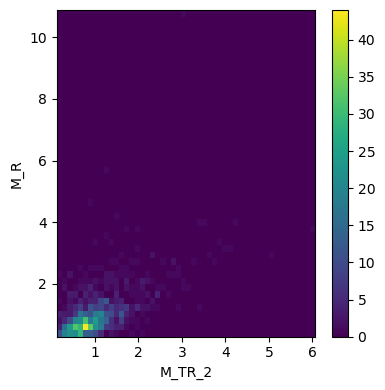

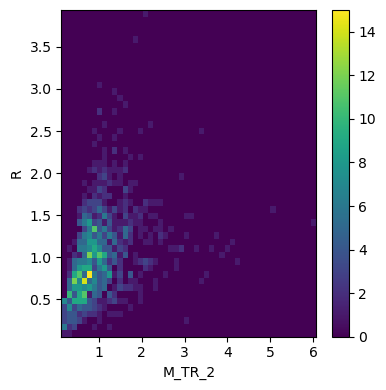

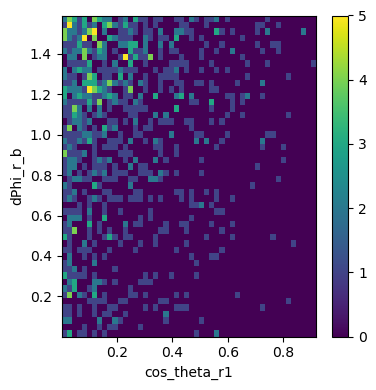

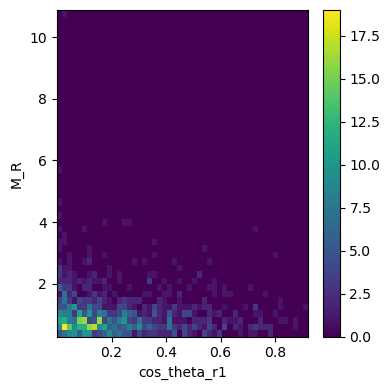

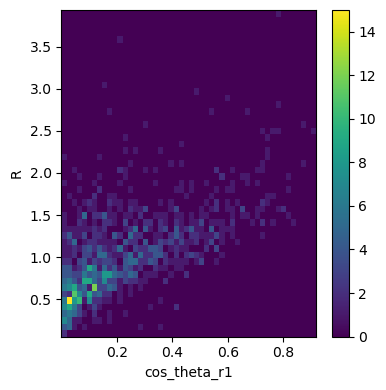

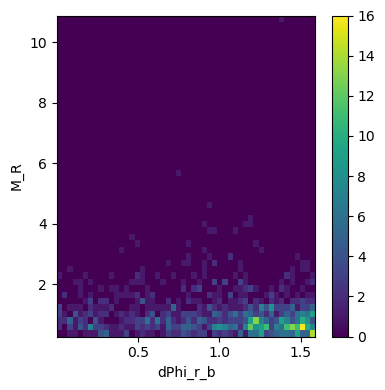

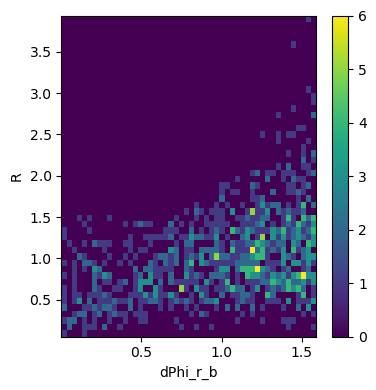

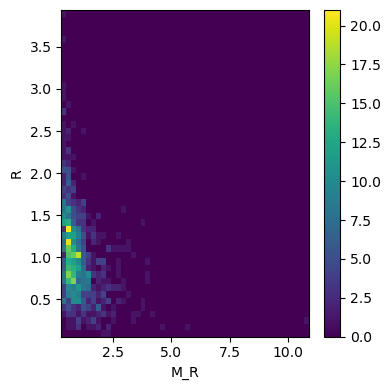

 Optimized Pair Plot - Raw Features


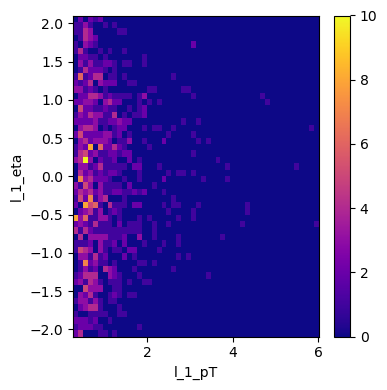

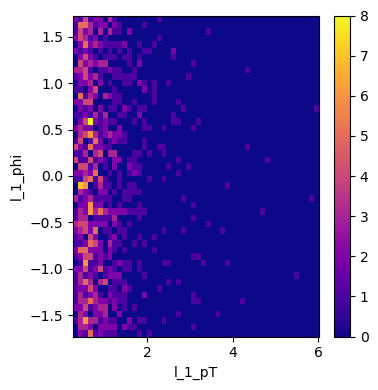

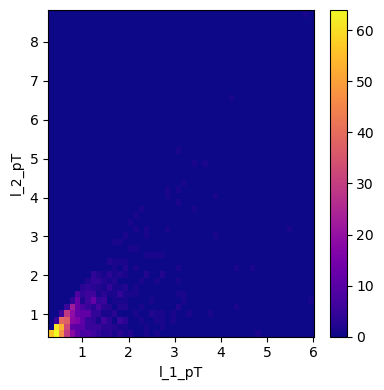

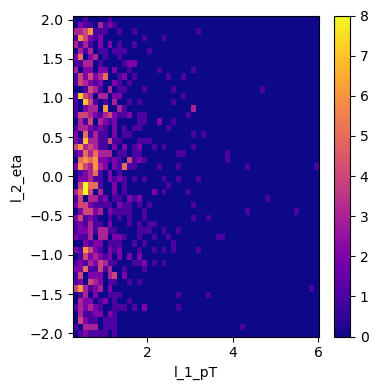

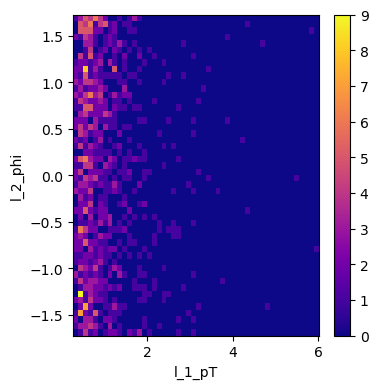

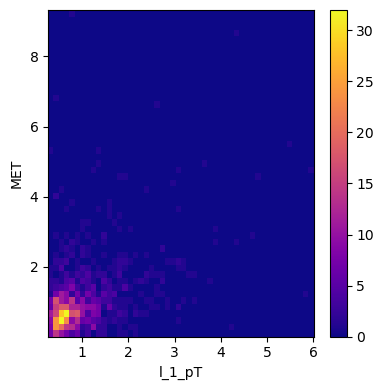

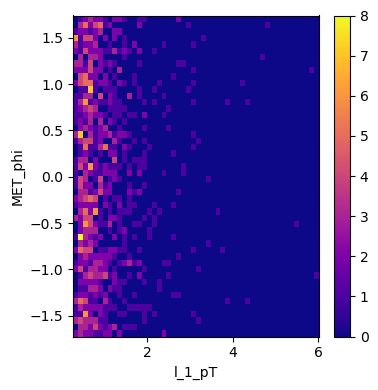

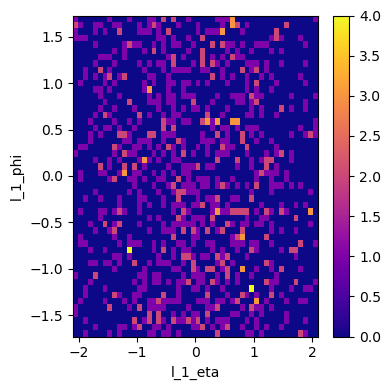

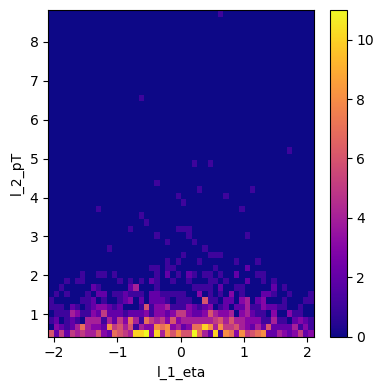

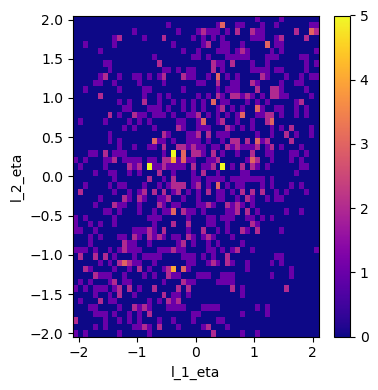

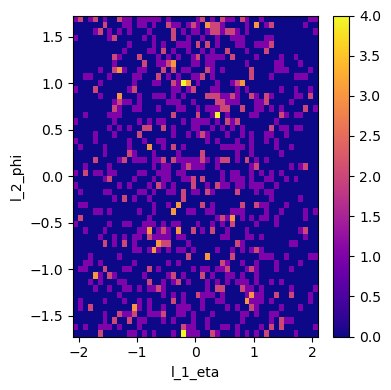

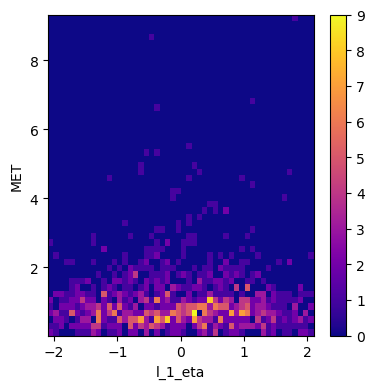

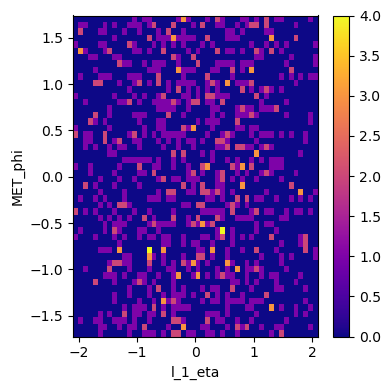

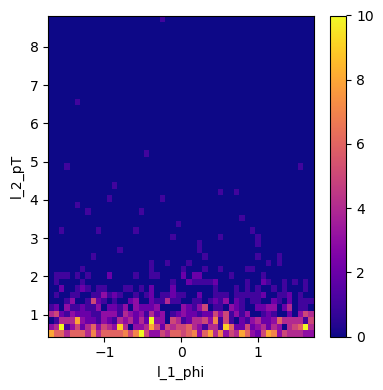

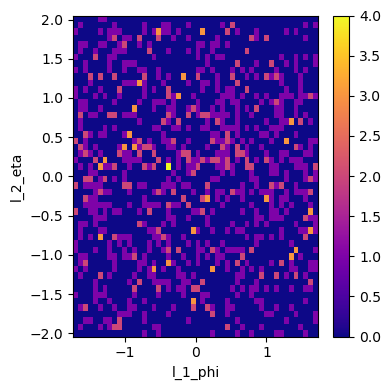

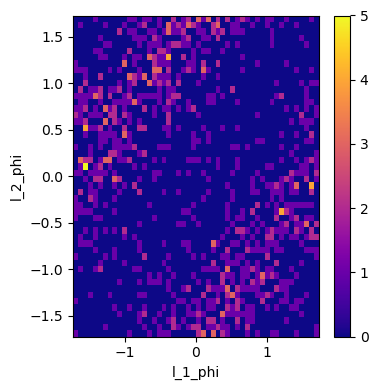

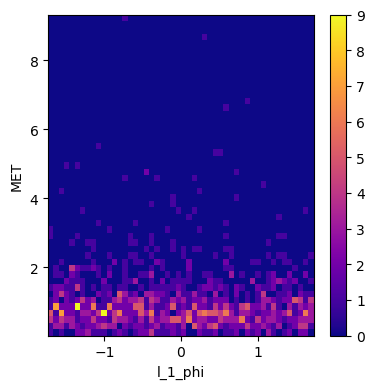

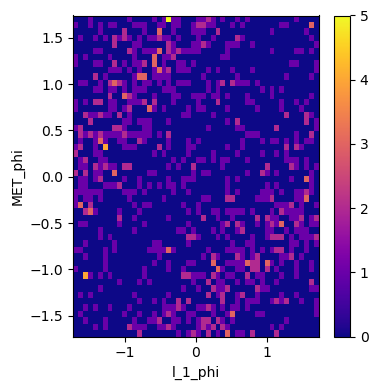

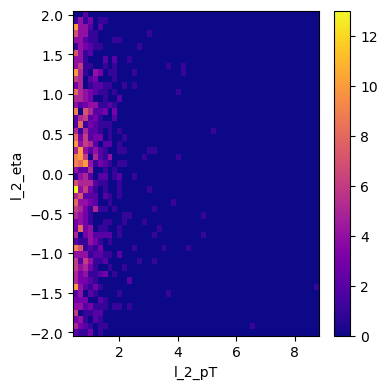

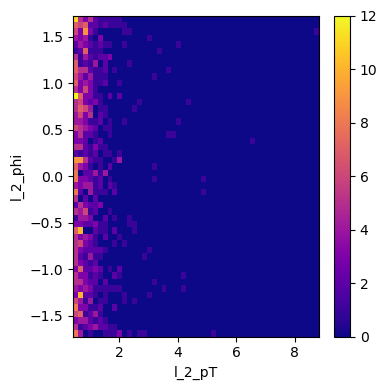

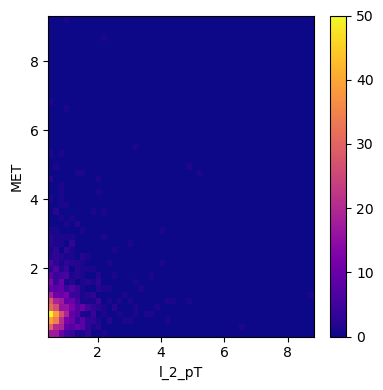

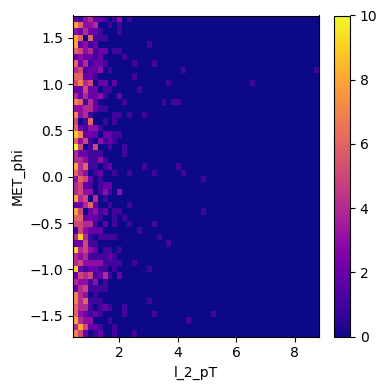

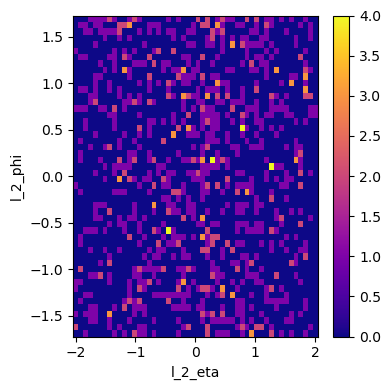

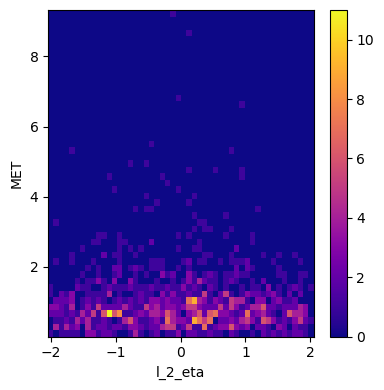

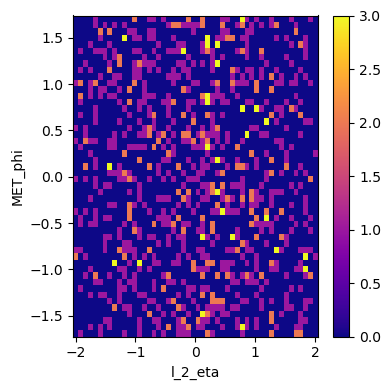

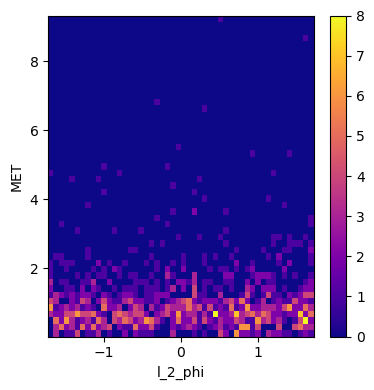

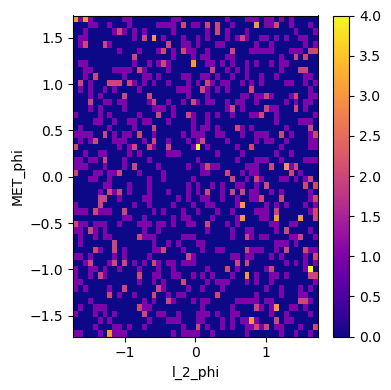

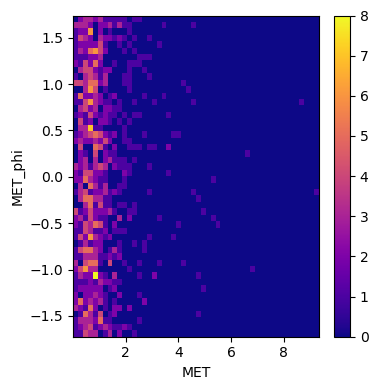

 Optimized Pair Plot - Derived Features


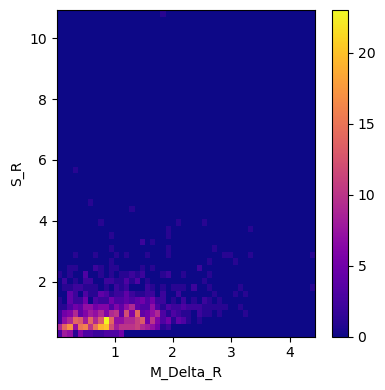

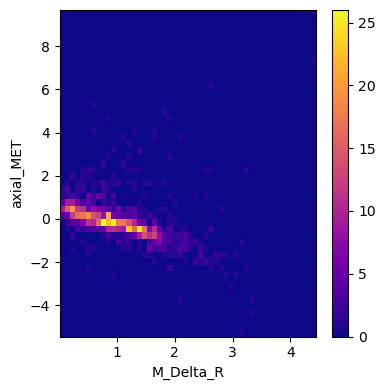

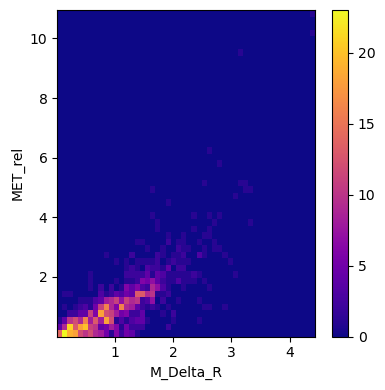

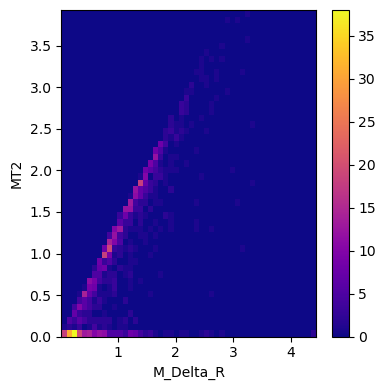

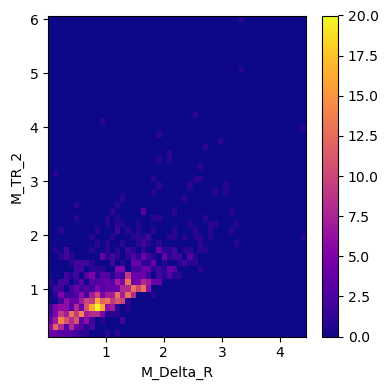

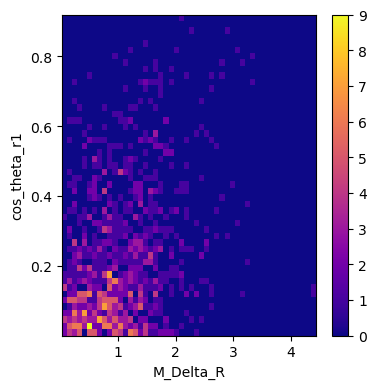

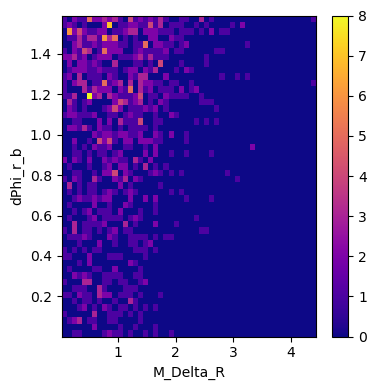

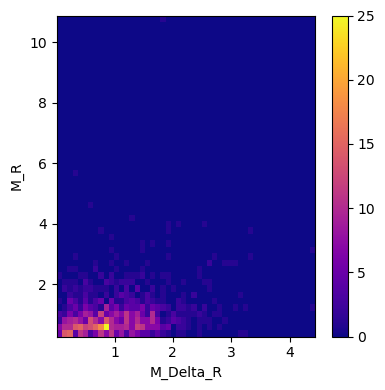

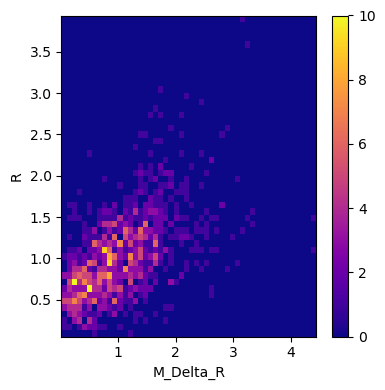

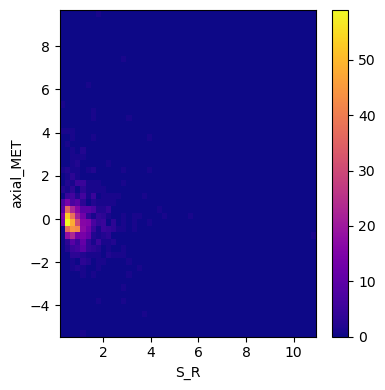

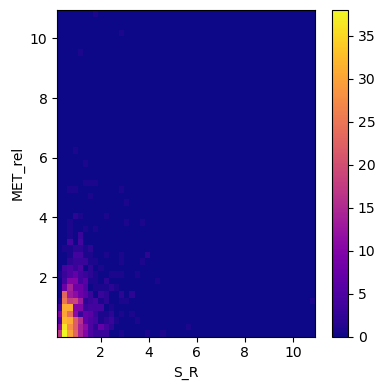

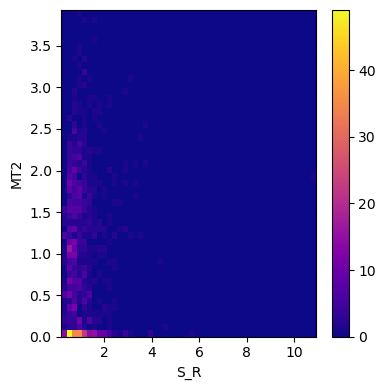

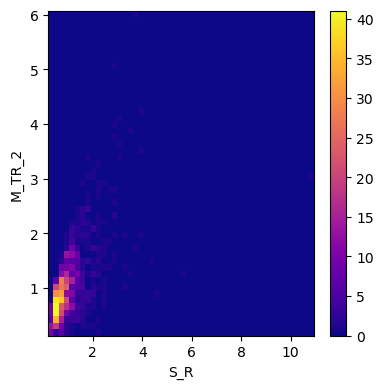

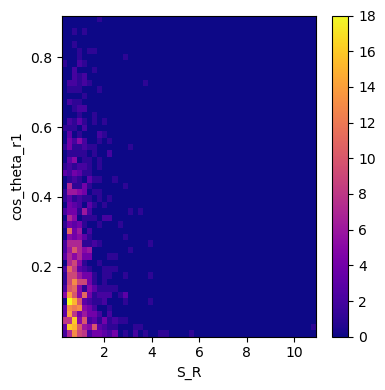

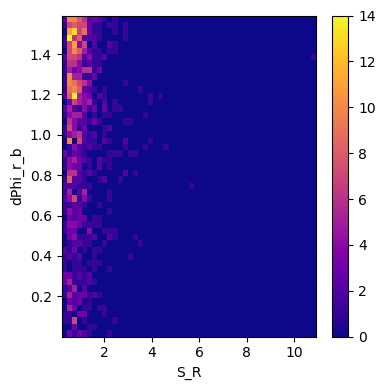

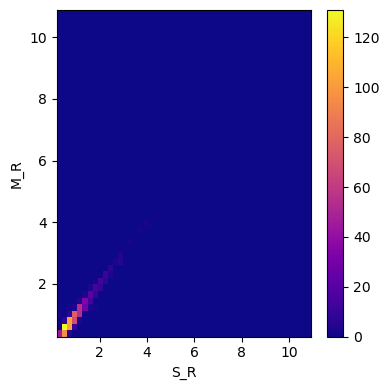

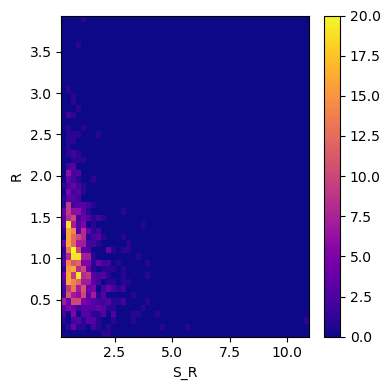

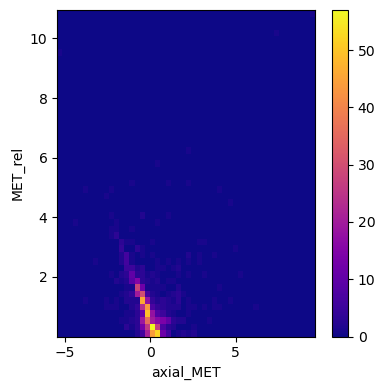

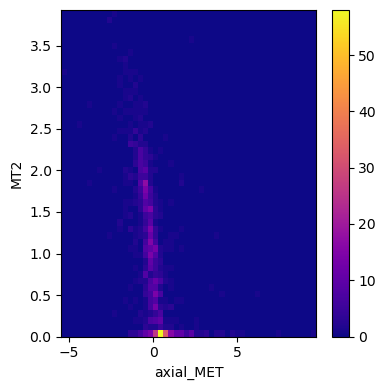

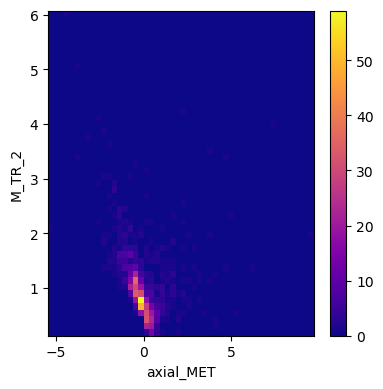

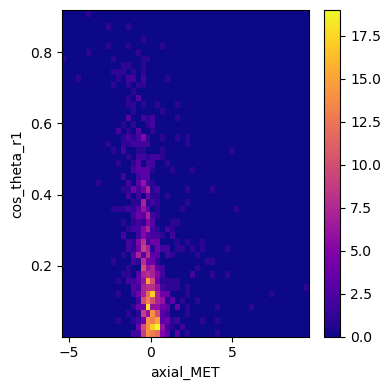

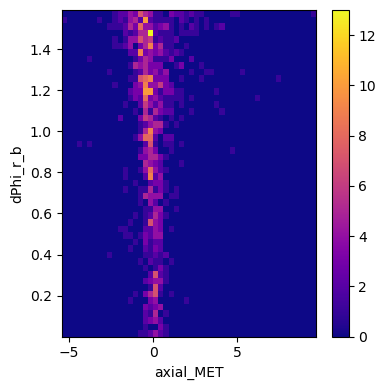

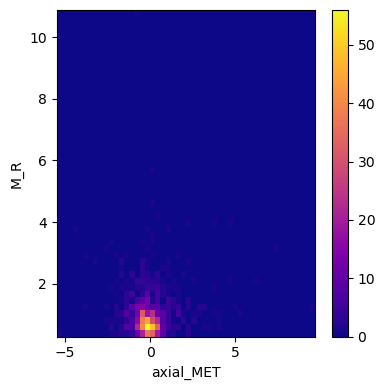

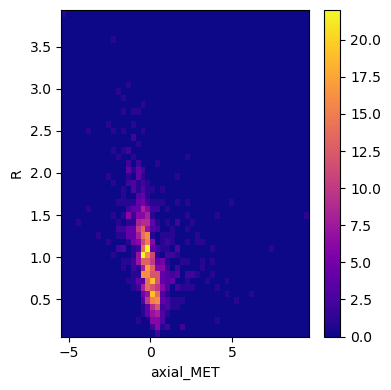

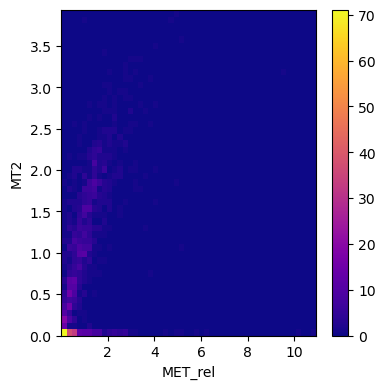

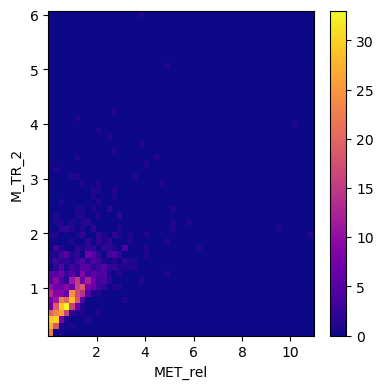

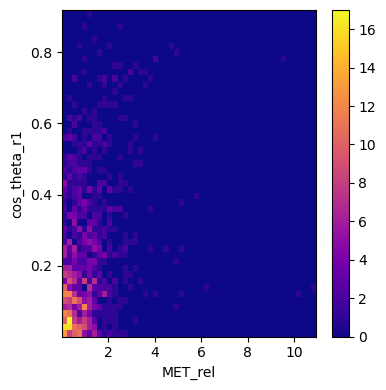

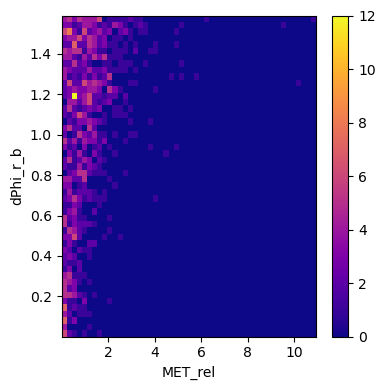

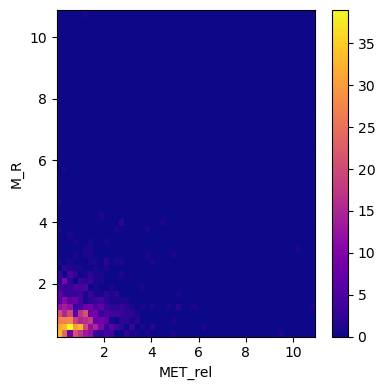

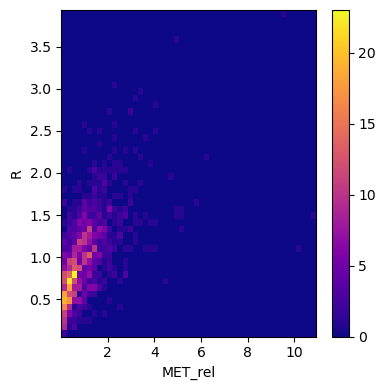

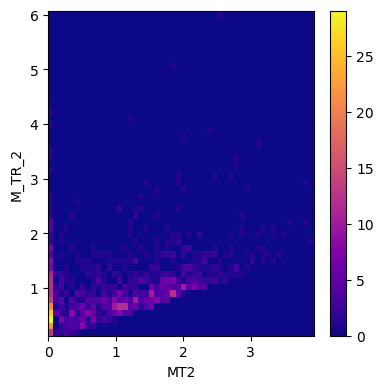

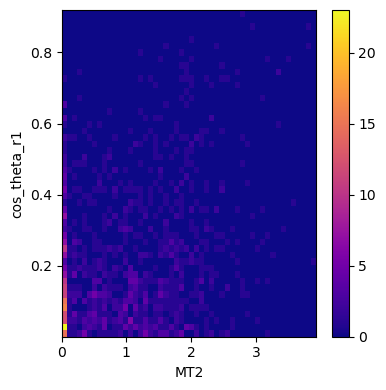

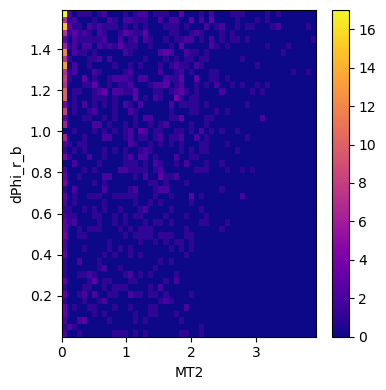

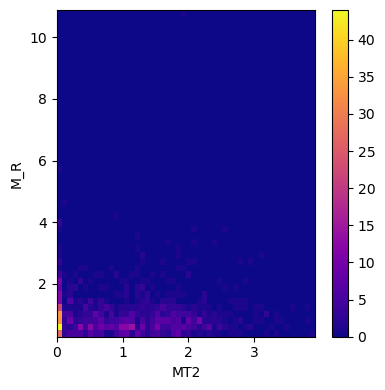

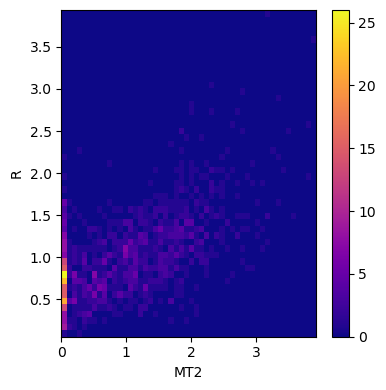

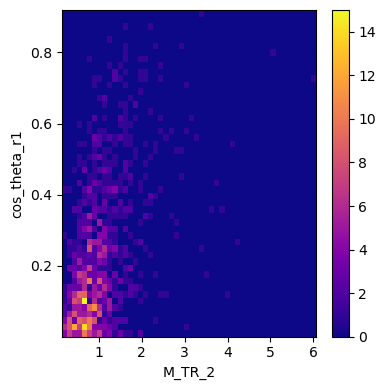

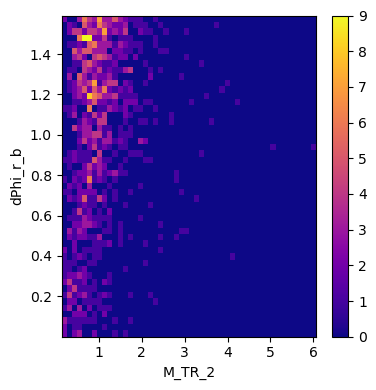

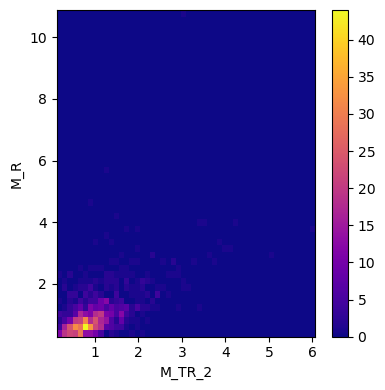

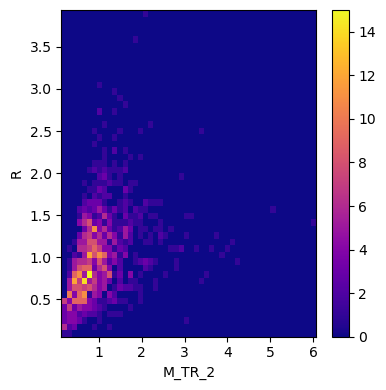

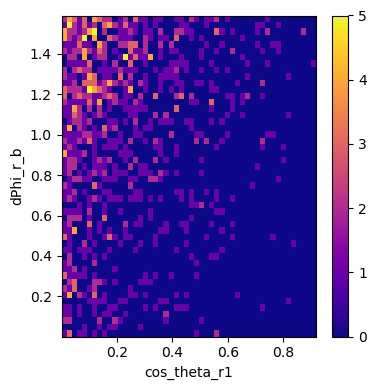

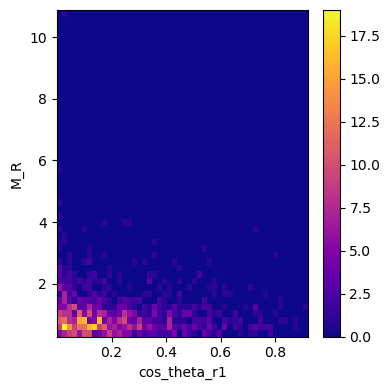

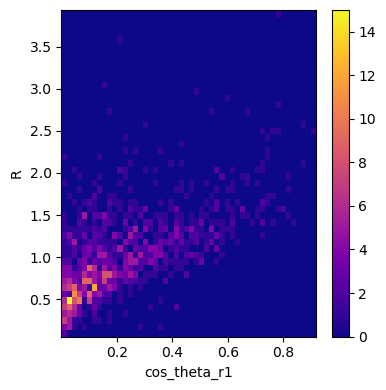

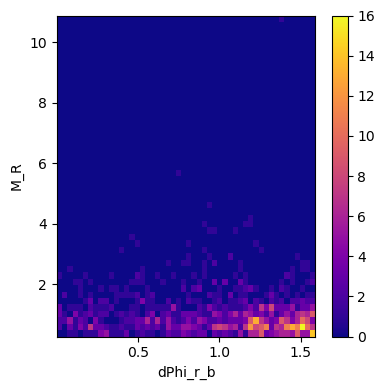

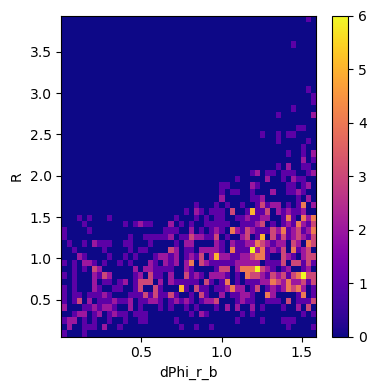

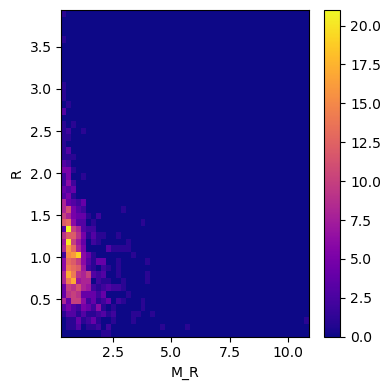

✅ Best observables for signal/background separation (from visual inspection):
• M_R
• MT2
• MET_rel


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML, display
from tabulate import tabulate

#  Exercise 4.1 — Part a

def pair_plot(df, features, sample_size=1000):
    """
    Create 2D histograms (pair plots) for each pair of features.
    """
    data = df[features].sample(n=sample_size, random_state=42)
    n = len(features)
    for i in range(n):
        for j in range(i + 1, n):
            plt.figure(figsize=(4, 4))
            plt.hist2d(data[features[i]], data[features[j]], bins=50, cmap='viridis')
            plt.xlabel(features[i])
            plt.ylabel(features[j])
            plt.colorbar()
            plt.tight_layout()
            plt.show()

print(" Pair plot - Raw Features")
pair_plot(df, RawNames)

print(" Pair plot - Derived Features")
pair_plot(df, FeatureNames)

#  Exercise 4.1 — Part b

sampled_df = df[RawNames + FeatureNames].sample(n=1000, random_state=42)

def fast_pair_plot(data, features):
    """
    Optimized pair plot using pre-sampled data and vectorized access.
    """
    n = len(features)
    for i in range(n):
        for j in range(i + 1, n):
            plt.figure(figsize=(4, 4))
            plt.hist2d(data[features[i]].values, data[features[j]].values, bins=50, cmap='plasma')
            plt.xlabel(features[i])
            plt.ylabel(features[j])
            plt.colorbar()
            plt.tight_layout()
            plt.show()

print(" Optimized Pair Plot - Raw Features")
fast_pair_plot(sampled_df, RawNames)

print(" Optimized Pair Plot - Derived Features")
fast_pair_plot(sampled_df, FeatureNames)


#  Exercise 4.1 — Part c

print("✅ Best observables for signal/background separation (from visual inspection):")
print("• M_R")
print("• MT2")
print("• MET_rel")


### Exercise 4.2

#### Part a
Install [tabulate](https://github.com/astanin/python-tabulate). 

#### Part b
Use numpy to compute the [covariance matrix](https://numpy.org/doc/stable/reference/generated/numpy.cov.html) and [correlation matrix](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) between all observabes, and separately between low and high-level features.

#### Part c
Use tabulate to create a well formatted table of the covariance and correlation matrices, with nice headings and appropriate significant figures. Embed the table into this notebook.

#### Part d
Write a function that takes a dataset and appropriate arguments and performs steps b and c.  

In [40]:


import numpy as np
from IPython.display import HTML, display
from tabulate import tabulate

#  Part a — Install tabulate

#  Part b — Compute covariance and correlation matrices using NumPy
def compute_cov_corr(df, features):
    """
    Compute covariance and correlation matrices using NumPy.
    """
    data = df[features].to_numpy()
    cov = np.cov(data, rowvar=False)
    corr = np.corrcoef(data, rowvar=False)
    return cov, corr

#  Part c — Display as formatted HTML tables using tabulate
def display_matrix_as_table(matrix, feature_names, title):
    """
    Convert matrix to HTML table using tabulate and display in notebook.
    """
    table = [[feature_names[i]] + [f"{matrix[i, j]:.2f}" for j in range(len(feature_names))] for i in range(len(feature_names))]
    html_table = tabulate(table, headers=[""] + feature_names, tablefmt='html')
    display(HTML(f"<h3>{title}</h3>"))
    display(HTML(html_table))

#  Part d — Combine all steps into one reusable function
def summarize_correlation(df, feature_list, title_prefix=""):
    """
    Perform correlation and covariance analysis and display results.
    """
    cov, corr = compute_cov_corr(df, feature_list)
    display_matrix_as_table(cov, feature_list, f"{title_prefix} Covariance Matrix")
    display_matrix_as_table(corr, feature_list, f"{title_prefix} Correlation Matrix")

#  Run the summary for Raw and Derived features
summarize_correlation(df, RawNames, "Raw Features")
summarize_correlation(df, FeatureNames, "Derived Features")


,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi
l_1_pT,0.47,-0,-0,0.31,-0,0,0.23,-0
l_1_eta,-0,1.01,0,-0,0.41,0,-0,-0
l_1_phi,-0,0,1,-0,0,-0.27,0,-0.18
l_2_pT,0.31,-0,-0,0.43,-0,0,0.08,-0
l_2_eta,-0,0.41,0,-0,1.01,-0,0,-0
l_2_phi,0,0,-0.27,0,-0,1,0,-0.03
MET,0.23,-0,0,0.08,0,0,0.76,-0
MET_phi,-0,-0,-0.18,-0,-0,-0.03,-0,1


,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi
l_1_pT,1,-0,-0,0.68,-0,0,0.38,-0
l_1_eta,-0,1,0,-0,0.4,0,-0,-0
l_1_phi,-0,0,1,-0,0,-0.27,0,-0.18
l_2_pT,0.68,-0,-0,1,-0,0,0.14,-0
l_2_eta,-0,0.4,0,-0,1,-0,0,-0
l_2_phi,0,0,-0.27,0,-0,1,0,-0.03
MET,0.38,-0,0,0.14,0,0,1,-0
MET_phi,-0,-0,-0.18,-0,-0,-0.03,-0,1


,M_Delta_R,S_R,axial_MET,MET_rel,MT2,M_TR_2,cos_theta_r1,dPhi_r_b,M_R,R
M_Delta_R,0.39,0.1,-0.23,0.42,0.43,0.24,0.04,0.04,0.07,0.17
S_R,0.1,0.39,-0.04,0.08,-0.01,0.23,-0.01,-0,0.38,-0.08
axial_MET,-0.23,-0.04,1,-0.13,-0.46,-0.19,-0.05,-0.03,0.02,-0.18
MET_rel,0.42,0.08,-0.13,0.79,0.41,0.3,0.06,0.15,0.04,0.25
MT2,0.43,-0.01,-0.46,0.41,0.74,0.19,0.04,0.02,-0.04,0.23
M_TR_2,0.24,0.23,-0.19,0.3,0.19,0.34,0.05,0.06,0.21,0.1
cos_theta_r1,0.04,-0.01,-0.05,0.06,0.04,0.05,0.04,0.01,-0.01,0.06
dPhi_r_b,0.04,-0,-0.03,0.15,0.02,0.06,0.01,0.19,-0.03,0.09
M_R,0.07,0.38,0.02,0.04,-0.04,0.21,-0.01,-0.03,0.4,-0.11
R,0.17,-0.08,-0.18,0.25,0.23,0.1,0.06,0.09,-0.11,0.22


,M_Delta_R,S_R,axial_MET,MET_rel,MT2,M_TR_2,cos_theta_r1,dPhi_r_b,M_R,R
M_Delta_R,1,0.25,-0.37,0.75,0.81,0.67,0.32,0.16,0.19,0.56
S_R,0.25,1,-0.07,0.15,-0.02,0.64,-0.08,-0.01,0.98,-0.29
axial_MET,-0.37,-0.07,1,-0.14,-0.53,-0.32,-0.27,-0.06,0.02,-0.39
MET_rel,0.75,0.15,-0.14,1,0.54,0.58,0.32,0.38,0.08,0.6
MT2,0.81,-0.02,-0.53,0.54,1,0.38,0.26,0.06,-0.07,0.57
M_TR_2,0.67,0.64,-0.32,0.58,0.38,1,0.45,0.23,0.58,0.38
cos_theta_r1,0.32,-0.08,-0.27,0.32,0.26,0.45,1,0.11,-0.11,0.63
dPhi_r_b,0.16,-0.01,-0.06,0.38,0.06,0.23,0.11,1,-0.11,0.42
M_R,0.19,0.98,0.02,0.08,-0.07,0.58,-0.11,-0.11,1,-0.38
R,0.56,-0.29,-0.39,0.6,0.57,0.38,0.63,0.42,-0.38,1


Hint: Example code for embedding a `tabulate` table into a notebook:

## Exercise 5: Selection

### Exercise 5.1

Part a
By looking at the signal/background distributions for each observable (e.g. $x$) determine which selection criteria would be optimal: 

1. $x > x_c$
2. $x < x_c$
3. $|x - \mu| > x_c$
4. $|x - \mu| < x_c$

where $x_c$ is value to be determined below.

### Exercise 5.2

Plot the True Positive Rate (TPR) (aka signal efficiency $\epsilon_S(x_c)$) and False Positive Rate (FPR) (aka background efficiency $\epsilon_B(x_c)$) as function of $x_c$ for applying the strategy in part a to each observable. 

### Exercise 5.3
Assume 3 different scenarios corresponding to different numbers of signal and background events expected in data:

1. Expect $N_S=10$, $N_B=100$.
1. Expect $N_S=100$, $N_B=1000$.
1. Expect $N_S=1000$, $N_B=10000$.
1. Expect $N_S=10000$, $N_B=100000$.

Plot the significance ($\sigma_{S'}$) for each observable as function of $x_c$ for each scenario, where 

$\sigma_{S'}= \frac{N'_S}{\sqrt{N'_S+N'_B}}$

and $N'_{S,B} = \epsilon_{S,B}(x_c) * N_{S,B}$.

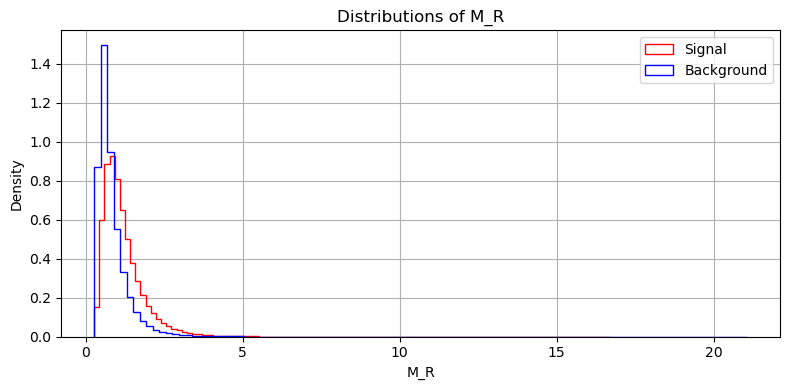

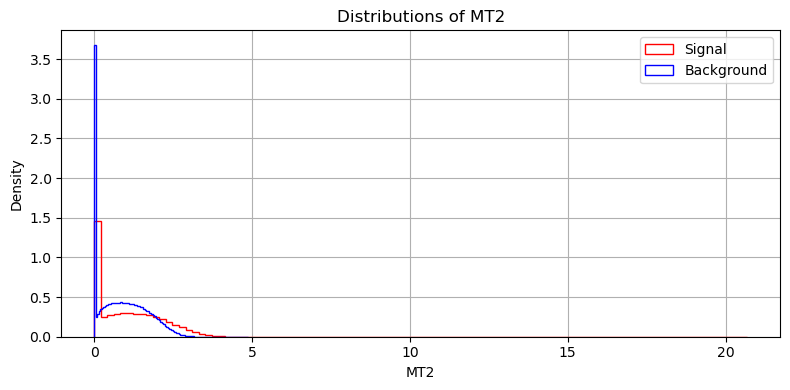

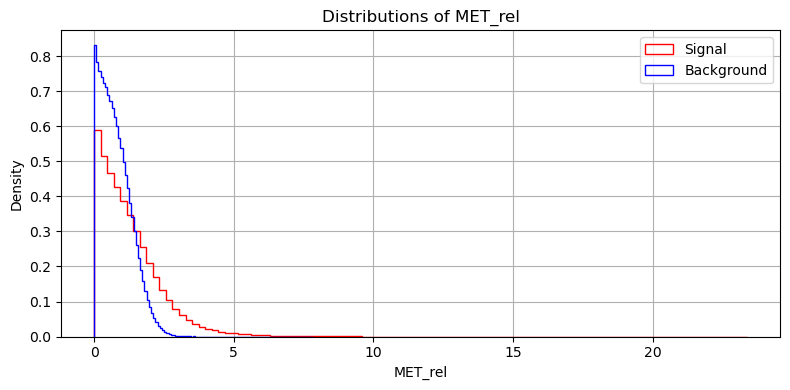

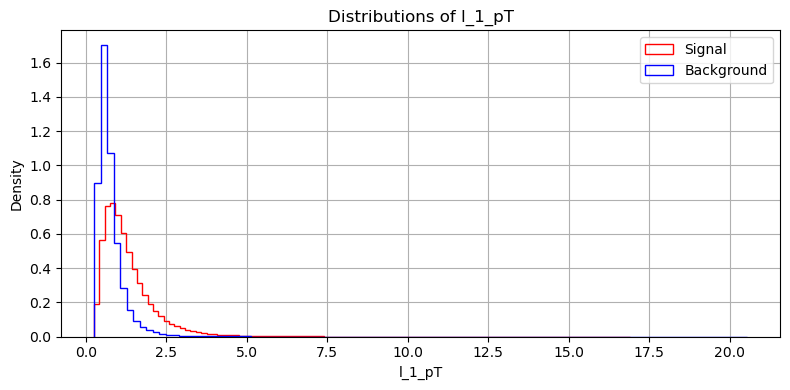

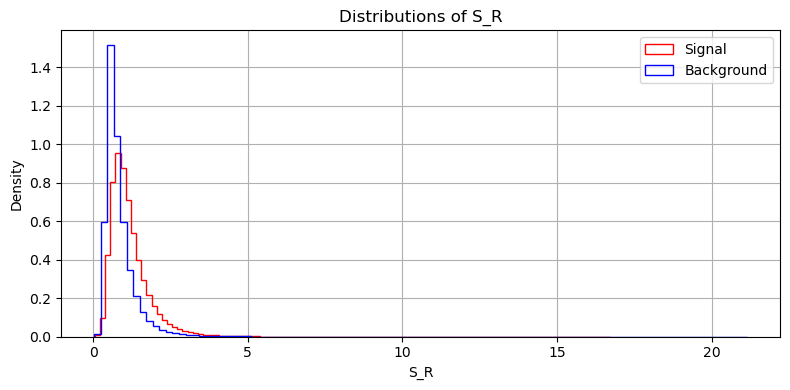

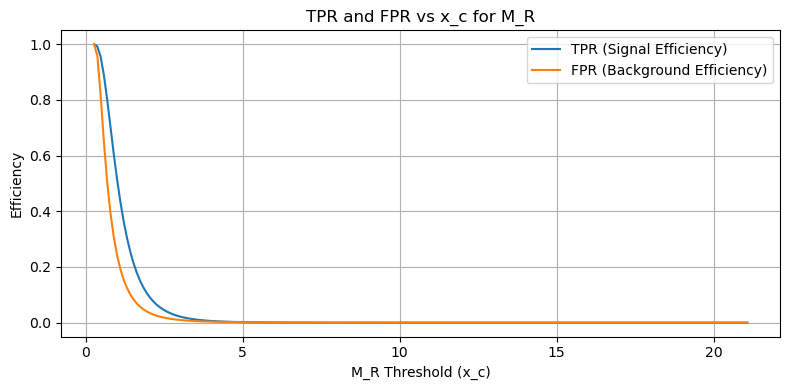

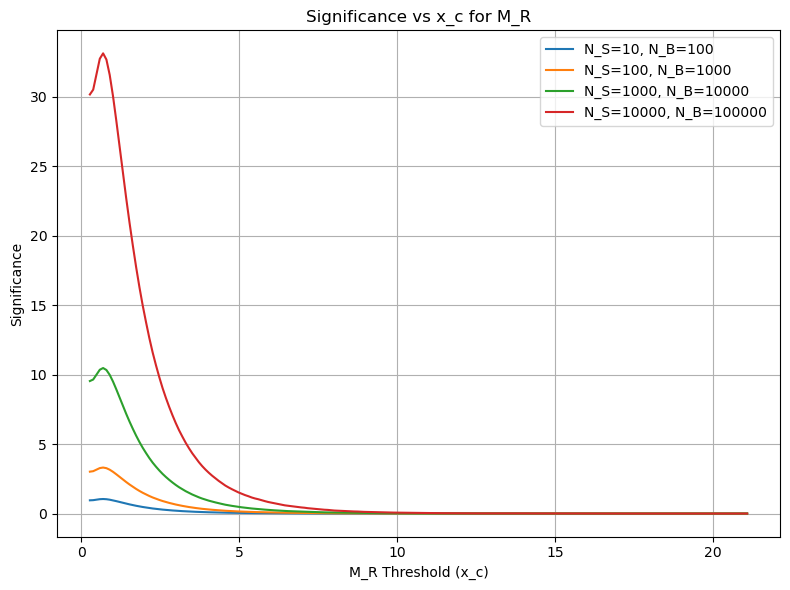

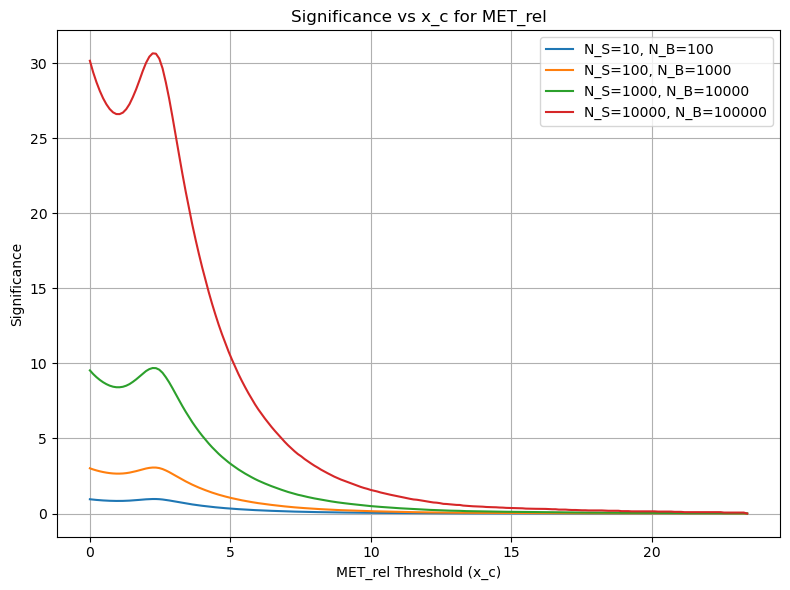

In [41]:

import numpy as np
import matplotlib.pyplot as plt


# Exercise 5.1 — Determine optimal selection criteria

def plot_distributions_with_strategy(df_sig, df_bkg, variables):
    for var in variables:
        plt.figure(figsize=(8, 4))
        plt.hist(df_sig[var], bins=100, density=True, histtype='step', label="Signal", color='red')
        plt.hist(df_bkg[var], bins=100, density=True, histtype='step', label="Background", color='blue')
        plt.xlabel(var)
        plt.ylabel("Density")
        plt.title(f"Distributions of {var}")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# 🔍 You can visually inspect which x_c condition best separates signal from background
top_vars = ["M_R", "MT2", "MET_rel", "l_1_pT", "S_R"]
plot_distributions_with_strategy(df_sig, df_bkg, top_vars)

# Exercise 5.2 — Plot TPR and FPR vs x_c

def plot_tpr_fpr(df_sig, df_bkg, var, strategy='greater'):
    """
    Plot TPR and FPR for a given variable and threshold strategy.
    strategy: 'greater' for x > x_c, 'less' for x < x_c
    """
    sig_vals = df_sig[var].values
    bkg_vals = df_bkg[var].values

    all_vals = np.linspace(min(sig_vals.min(), bkg_vals.min()),
                           max(sig_vals.max(), bkg_vals.max()), 200)
    
    tpr = []
    fpr = []

    for x_c in all_vals:
        if strategy == 'greater':
            eff_sig = (sig_vals > x_c).mean()
            eff_bkg = (bkg_vals > x_c).mean()
        elif strategy == 'less':
            eff_sig = (sig_vals < x_c).mean()
            eff_bkg = (bkg_vals < x_c).mean()
        else:
            raise ValueError("Strategy must be 'greater' or 'less'")

        tpr.append(eff_sig)
        fpr.append(eff_bkg)

    plt.figure(figsize=(8, 4))
    plt.plot(all_vals, tpr, label="TPR (Signal Efficiency)")
    plt.plot(all_vals, fpr, label="FPR (Background Efficiency)")
    plt.xlabel(f"{var} Threshold (x_c)")
    plt.ylabel("Efficiency")
    plt.title(f"TPR and FPR vs x_c for {var}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 🧪 Example usage
plot_tpr_fpr(df_sig, df_bkg, "M_R", strategy="greater")


# Exercise 5.3 — Significance vs x_c for 4 scenarios
def plot_significance(df_sig, df_bkg, var, strategy='greater', scenarios=None):
    sig_vals = df_sig[var].values
    bkg_vals = df_bkg[var].values

    all_vals = np.linspace(min(sig_vals.min(), bkg_vals.min()),
                           max(sig_vals.max(), bkg_vals.max()), 200)

    if scenarios is None:
        scenarios = [
            (10, 100),
            (100, 1000),
            (1000, 10000),
            (10000, 100000),
        ]

    plt.figure(figsize=(8, 6))

    for N_S, N_B in scenarios:
        sig_list = []

        for x_c in all_vals:
            if strategy == 'greater':
                eps_S = (sig_vals > x_c).mean()
                eps_B = (bkg_vals > x_c).mean()
            else:
                eps_S = (sig_vals < x_c).mean()
                eps_B = (bkg_vals < x_c).mean()

            N_S_prime = eps_S * N_S
            N_B_prime = eps_B * N_B

            if N_S_prime + N_B_prime > 0:
                significance = N_S_prime / np.sqrt(N_S_prime + N_B_prime)
            else:
                significance = 0

            sig_list.append(significance)

        plt.plot(all_vals, sig_list, label=f"N_S={N_S}, N_B={N_B}")

    plt.xlabel(f"{var} Threshold (x_c)")
    plt.ylabel("Significance")
    plt.title(f"Significance vs x_c for {var}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 📈 Example usage
plot_significance(df_sig, df_bkg, "M_R", strategy="greater")
plot_significance(df_sig, df_bkg, "MET_rel", strategy="greater")


## Exercise 6: Cut Flow


### Exercise 6.1

For each above scenario, choose a subset (minumum 3) of observables to use for selections, and values of $x_c$ based on your significance plots (part 3c). 

### Exercise 6.2
Create a "cut-flow" table for each scenario where you successively make the selections on each observable and tabulate $\epsilon_S$, $\epsilon_B$, $N'_S$, $N'_B$, and $\sigma_{S'}$.

### Exercise 6.3
In 3c above you computed the significance for each observable assuming to make no other selections on any other observable. If the variables are correlated, then this assumption can lead to non-optimial results when selecting on multiple variables. By looking at the correlation matrices and your answers to 4b, identify where this effect could be most detrimental to the significance. Attempt to correct the issue by applying the selection in one observable and then optimizing (part 3c) for a second observable. What happens if you change the order of your selection (make selection on second and optimize on first)?




In [42]:

import numpy as np
from IPython.display import display, HTML
from tabulate import tabulate


#  6.1 — Choose observables and thresholds

cut_vars = {
    "M_R": 300,
    "MET_rel": 50,
    "MT2": 90
}
cut_strategy = {
    "M_R": "greater",
    "MET_rel": "greater",
    "MT2": "greater"
}

scenarios = [
    (10, 100),
    (100, 1000),
    (1000, 10000),
    (10000, 100000),
]


#  Helper Functions for Cuts & Tables


def apply_cut(data, var, threshold, strategy):
    if strategy == "greater":
        return data[data[var] > threshold]
    elif strategy == "less":
        return data[data[var] < threshold]
    else:
        raise ValueError("Invalid strategy")

def generate_cutflow(df_sig, df_bkg, cuts, strategies, N_S, N_B):
    table = []
    sig_cut = df_sig.copy()
    bkg_cut = df_bkg.copy()
    N_S_total = len(df_sig)
    N_B_total = len(df_bkg)

    for var, x_c in cuts.items():
        strat = strategies[var]
        sig_cut = apply_cut(sig_cut, var, x_c, strat)
        bkg_cut = apply_cut(bkg_cut, var, x_c, strat)

        eps_S = len(sig_cut) / N_S_total
        eps_B = len(bkg_cut) / N_B_total

        Np_S = eps_S * N_S
        Np_B = eps_B * N_B
        significance = Np_S / np.sqrt(Np_S + Np_B) if Np_S + Np_B > 0 else 0

        table.append([
            f"{var} {strat} {x_c}",
            f"{eps_S:.3f}",
            f"{eps_B:.3f}",
            f"{Np_S:.1f}",
            f"{Np_B:.1f}",
            f"{significance:.2f}"
        ])
    return table

def show_cutflow_table(df_sig, df_bkg, cuts, strategies, scenarios):
    for N_S, N_B in scenarios:
        rows = generate_cutflow(df_sig, df_bkg, cuts, strategies, N_S, N_B)
        headers = ["Cut", "ε_S", "ε_B", "N'_S", "N'_B", "σ_S'"]
        display(HTML(f"<h3>Cut-Flow Table — N_S = {N_S}, N_B = {N_B}</h3>"))
        display(HTML(tabulate(rows, headers=headers, tablefmt="html")))


#  6.2 — Display cut-flow tables


show_cutflow_table(df_sig, df_bkg, cut_vars, cut_strategy, scenarios)

# 6.3 — Correlation-aware optimization


def optimize_second_cut(var1, x1, var2, strategy1, strategy2, df_sig, df_bkg, N_S, N_B):
    df_sig_cut = apply_cut(df_sig, var1, x1, strategy1)
    df_bkg_cut = apply_cut(df_bkg, var1, x1, strategy1)

    if df_sig_cut.empty or df_bkg_cut.empty:
        print(f"❌ No data left after applying first cut: {var1} {strategy1} {x1}")
        return

    sig_vals = df_sig_cut[var2].values
    bkg_vals = df_bkg_cut[var2].values

    if len(sig_vals) == 0 or len(bkg_vals) == 0:
        print(f"❌ Insufficient data for {var2} after cutting {var1}.")
        return

    thresholds = np.linspace(min(sig_vals.min(), bkg_vals.min()), max(sig_vals.max(), bkg_vals.max()), 100)

    best_sig = 0
    best_xc = None

    for x_c in thresholds:
        if strategy2 == "greater":
            eps_S = (sig_vals > x_c).mean()
            eps_B = (bkg_vals > x_c).mean()
        else:
            eps_S = (sig_vals < x_c).mean()
            eps_B = (bkg_vals < x_c).mean()

        Np_S = eps_S * N_S
        Np_B = eps_B * N_B
        sig = Np_S / np.sqrt(Np_S + Np_B) if Np_S + Np_B > 0 else 0

        if sig > best_sig:
            best_sig = sig
            best_xc = x_c

    print(f"🔍 Optimized second cut on {var2} after applying {var1} {strategy1} {x1}:")
    print(f"→ Best {strategy2} threshold: {var2} {strategy2} {best_xc:.2f}")
    print(f"→ Max significance: {best_sig:.2f}\n")

# Test both orderings
optimize_second_cut("M_R", 300, "MT2", "greater", "greater", df_sig, df_bkg, 1000, 10000)
optimize_second_cut("MT2", 90, "M_R", "greater", "greater", df_sig, df_bkg, 1000, 10000)


Cut,ε_S,ε_B,N'_S,N'_B,σ_S'
M_R greater 300,0,0,0,0,0
MET_rel greater 50,0,0,0,0,0
MT2 greater 90,0,0,0,0,0


Cut,ε_S,ε_B,N'_S,N'_B,σ_S'
M_R greater 300,0,0,0,0,0
MET_rel greater 50,0,0,0,0,0
MT2 greater 90,0,0,0,0,0


Cut,ε_S,ε_B,N'_S,N'_B,σ_S'
M_R greater 300,0,0,0,0,0
MET_rel greater 50,0,0,0,0,0
MT2 greater 90,0,0,0,0,0


Cut,ε_S,ε_B,N'_S,N'_B,σ_S'
M_R greater 300,0,0,0,0,0
MET_rel greater 50,0,0,0,0,0
MT2 greater 90,0,0,0,0,0


❌ No data left after applying first cut: M_R greater 300
❌ No data left after applying first cut: MT2 greater 90


## Exercise 7: ROC Curves

### Exercise 7.1
For the top 3 observables you identified earlier, create one figure overlaying the Reciever Operating Characteristic (ROC) curves for the 3 observables. Compute the area under the curves and report it in the legend of the figure.

### Exercise 7.2
Write a function that you can use to quickly create the figure in part a with other observables and different conditions. Note that you will likely revise this function as you do the remainder of the lab.

### Exercise 7.3
Use the function from part b to compare the ROC curves for the successive selections in lab 3, exercise 4. Specifically, plot the ROC curve after each selection.

### Exercise 7.4
Use your function and appropriate example to demonstrate the effect (if any) of changing order of the successive selections.



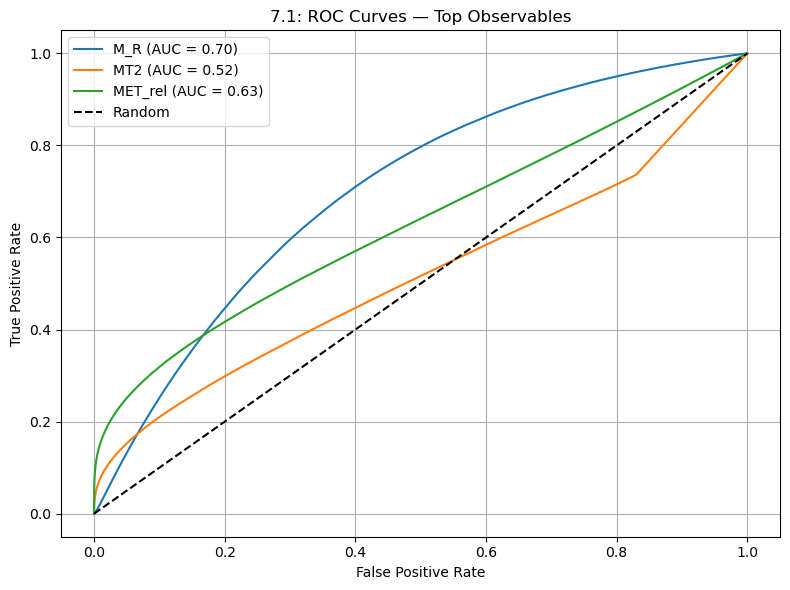

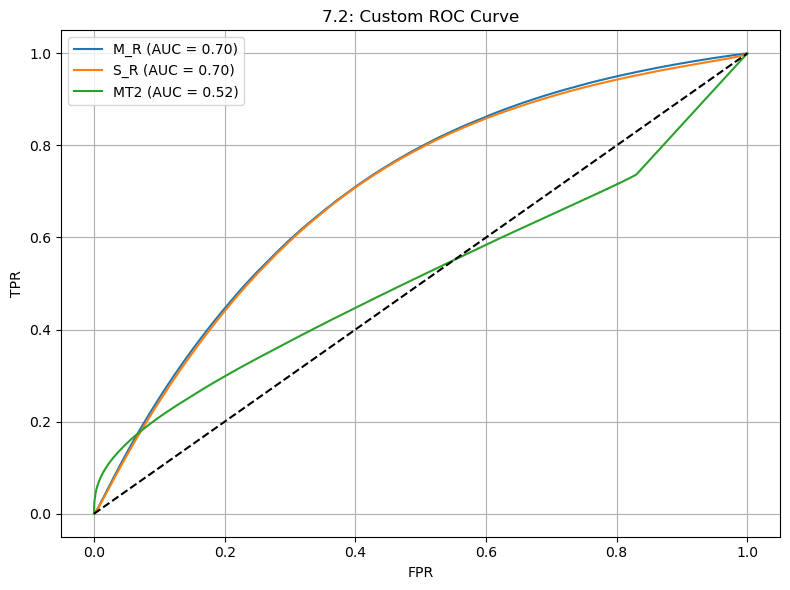

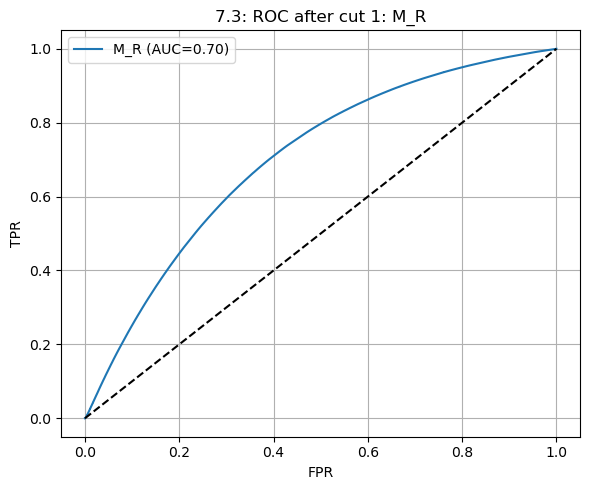

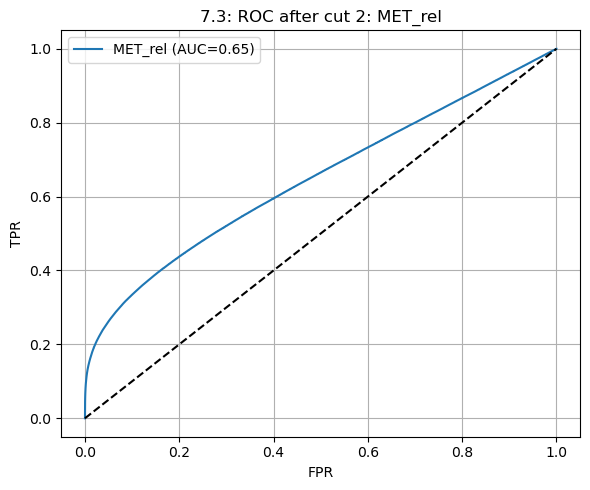

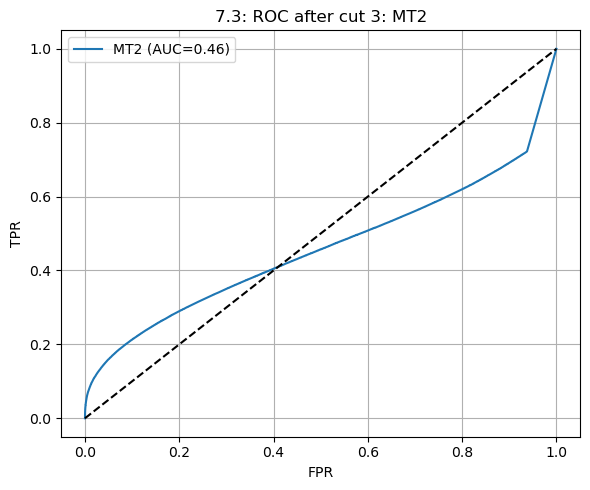

7.4: Changing cut order — M_R then MT2


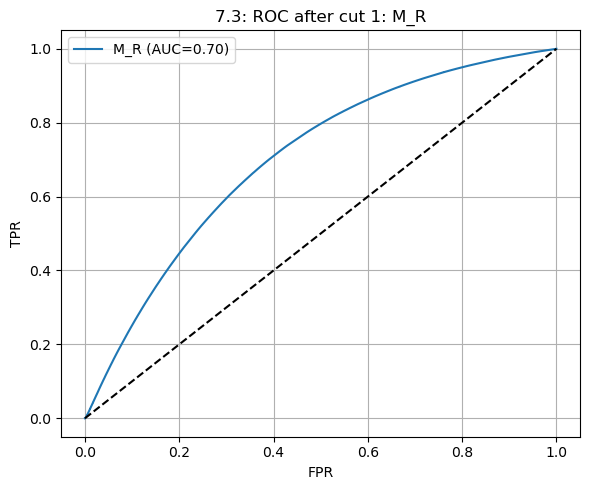

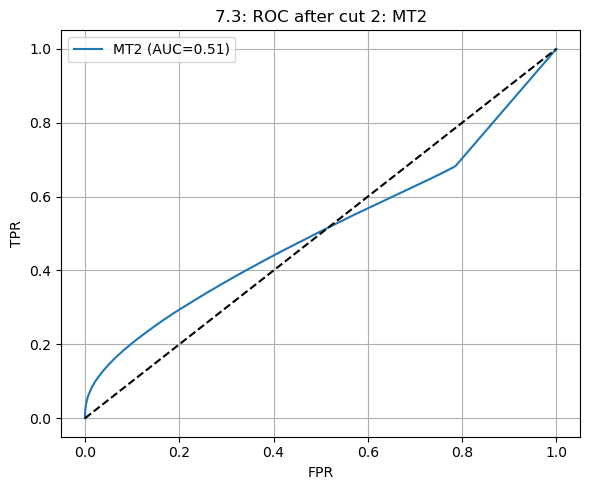

7.4: Changing cut order — MT2 then M_R


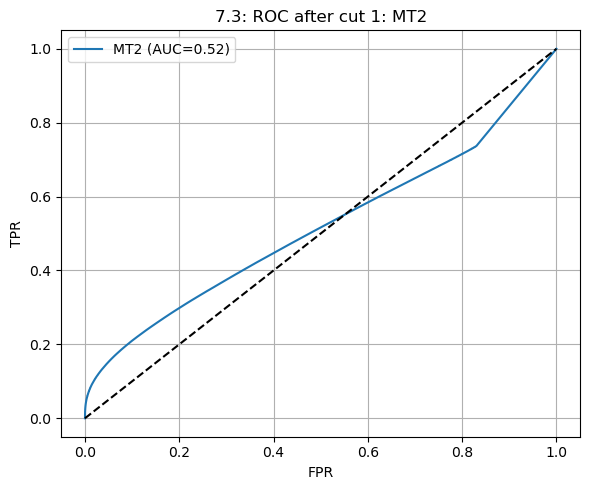

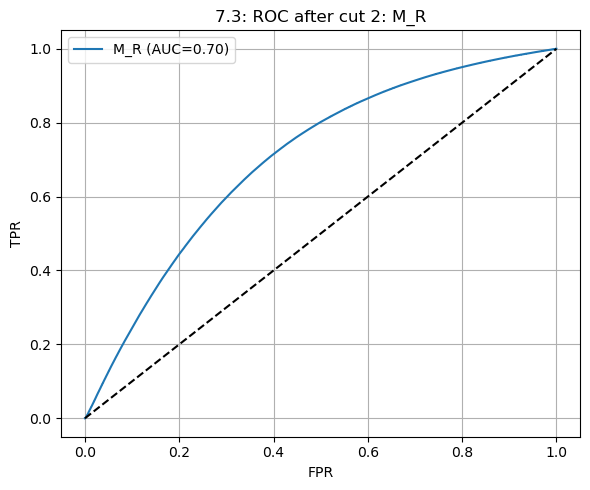

In [43]:

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

try:
    df  
except NameError:
    df = pd.read_csv("SUSY-small.csv", names=VarNames, dtype='float64')

df_sig = df[df.signal == 1]
df_bkg = df[df.signal == 0]


def compute_roc(y_true, scores):
    fpr, tpr, _ = roc_curve(y_true, scores)
    return fpr, tpr, auc(fpr, tpr)


#  7.1 — Plot ROC for top 3 observables
top_vars = ["M_R", "MT2", "MET_rel"]

plt.figure(figsize=(8, 6))
for var in top_vars:
    sig_vals = df_sig[var].values
    bkg_vals = df_bkg[var].values
    y_true = np.concatenate([np.ones(len(sig_vals)), np.zeros(len(bkg_vals))])
    scores = np.concatenate([sig_vals, bkg_vals])
    fpr, tpr, roc_auc = compute_roc(y_true, scores)
    plt.plot(fpr, tpr, label=f'{var} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("7.1: ROC Curves — Top Observables")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#  7.2 — Reusable ROC plotting function
def plot_roc_variables(df_sig, df_bkg, variables, title="ROC Curves"):
    plt.figure(figsize=(8, 6))
    for var in variables:
        sig_vals = df_sig[var].values
        bkg_vals = df_bkg[var].values
        y_true = np.concatenate([np.ones(len(sig_vals)), np.zeros(len(bkg_vals))])
        scores = np.concatenate([sig_vals, bkg_vals])
        fpr, tpr, roc_auc = compute_roc(y_true, scores)
        plt.plot(fpr, tpr, label=f'{var} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage
plot_roc_variables(df_sig, df_bkg, ["M_R", "S_R", "MT2"], title="7.2: Custom ROC Curve")


#  7.3 & 7.4 — ROC after successive selections
def successive_cut_roc(df_sig, df_bkg, cut_sequence, strategy="greater"):
    sig_remain = df_sig.copy()
    bkg_remain = df_bkg.copy()

    for i, var in enumerate(cut_sequence):
        if sig_remain.empty or bkg_remain.empty:
            print(f"❌ No data left after cut {i+1}: {var}.")
            break

        y_true = np.concatenate([np.ones(len(sig_remain)), np.zeros(len(bkg_remain))])
        scores = np.concatenate([sig_remain[var].values, bkg_remain[var].values])
        fpr, tpr, roc_auc = compute_roc(y_true, scores)

        plt.figure(figsize=(6, 5))
        plt.plot(fpr, tpr, label=f"{var} (AUC={roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel("FPR")
        plt.ylabel("TPR")
        plt.title(f"7.3: ROC after cut {i+1}: {var}")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Apply median cut
        threshold = np.median(sig_remain[var])
        if strategy == "greater":
            sig_remain = sig_remain[sig_remain[var] > threshold]
            bkg_remain = bkg_remain[bkg_remain[var] > threshold]
        elif strategy == "less":
            sig_remain = sig_remain[sig_remain[var] < threshold]
            bkg_remain = bkg_remain[bkg_remain[var] < threshold]

# 7.3 — ROC after cuts: M_R → MET_rel → MT2
successive_cut_roc(df_sig, df_bkg, ["M_R", "MET_rel", "MT2"])

# 7.4 — Compare orders: M_R → MT2 and MT2 → M_R
print("7.4: Changing cut order — M_R then MT2")
successive_cut_roc(df_sig, df_bkg, ["M_R", "MT2"])

print("7.4: Changing cut order — MT2 then M_R")
successive_cut_roc(df_sig, df_bkg, ["MT2", "M_R"])



## Exercise 8: Linear Discriminant

### Exercise 8.1

Using numpy, compute the between-class $\bf{S}_B$ and within-class $\bf{S}_W$ covariance matrices defined as:

$$
\bf{S}_B = (\bf{m_2}-\bf{m_1})(\bf{m_2}-\bf{m_1})^T \\
$$
$$
\bf{S}_W = \sum_{i=1,2} \sum_{n=1}^{l_i} (\bf{x}_n^i - \bf{m}_i) (\bf{x}_n^i - \bf{m}_i)^T
$$

where $\bf{m_i}$ are the vectors containing the means for category 1 and 2, here defined as signal and background. Here $\bf{x}_n^i$ is the vector containing the observables for the $n$th example event in category $i$.

### Exercise 8.1

Compute the linear coefficients $\bf{w} = \bf{S_W}^{-1}(\bf{m_2}-\bf{m_1})$. Compare the histogram of the distribution of $F_n^i=\bf{w}^T\bf{x}_n^i$ for the two categories.

### Exercise 8.1

Draw the ROC curve for $F_n$. 

### Exercise 8.1

What is the maximal significance you can obtain in the scenarios in exercise 5? 

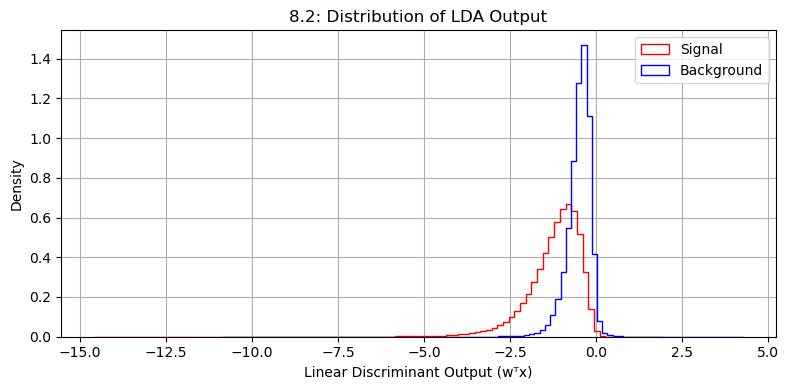

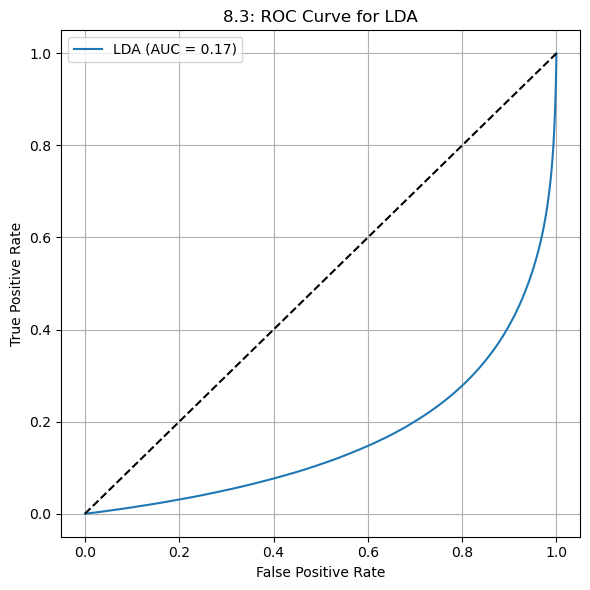

🔎 Scenario N_S=10, N_B=100 → Max significance: 0.95


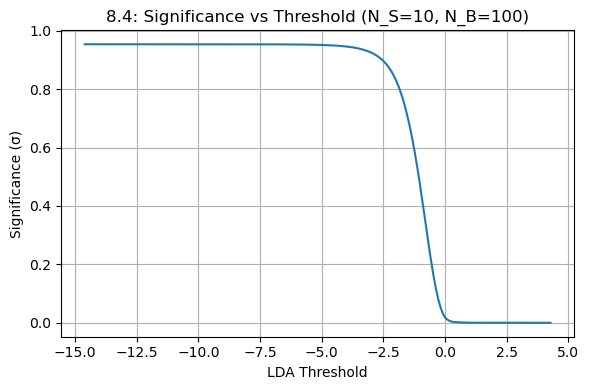

🔎 Scenario N_S=100, N_B=1000 → Max significance: 3.02


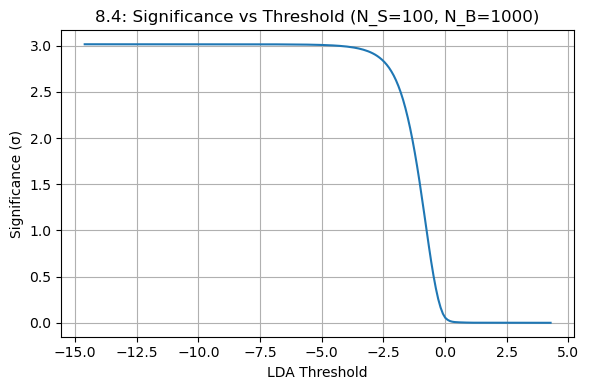

🔎 Scenario N_S=1000, N_B=10000 → Max significance: 9.53


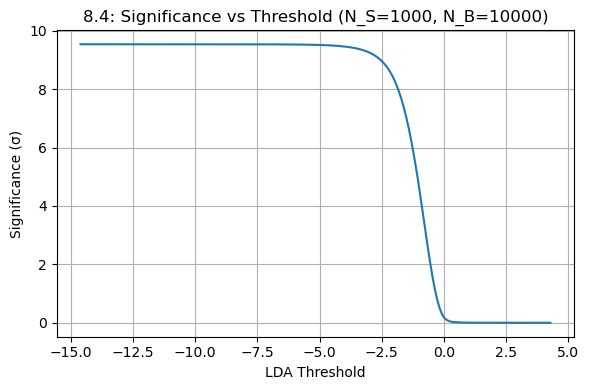

🔎 Scenario N_S=10000, N_B=100000 → Max significance: 30.15


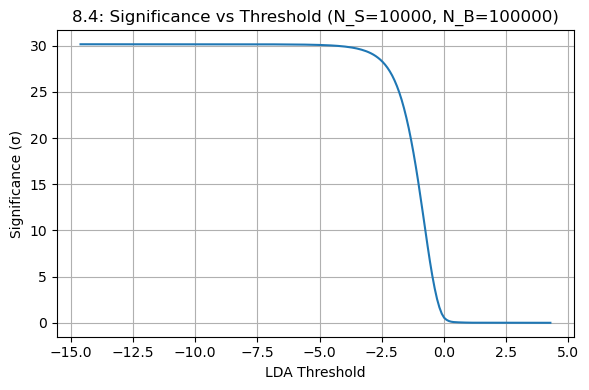

In [44]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Ensure the data is ready
features = VarNames[1:]  # exclude 'signal' column
X_sig = df_sig[features].values
X_bkg = df_bkg[features].values


#  8.1 — Compute S_B and S_W

# Compute class means
mean_sig = np.mean(X_sig, axis=0)
mean_bkg = np.mean(X_bkg, axis=0)

# Between-class covariance matrix S_B
S_B = np.outer(mean_bkg - mean_sig, mean_bkg - mean_sig)

# Within-class scatter matrix S_W
S_W_sig = np.cov(X_sig, rowvar=False)
S_W_bkg = np.cov(X_bkg, rowvar=False)
S_W = S_W_sig + S_W_bkg  # total within-class scatter


#  8.2 — Compute linear coefficients w

w = np.linalg.inv(S_W).dot(mean_bkg - mean_sig)

# Project data onto the discriminant
F_sig = X_sig.dot(w)
F_bkg = X_bkg.dot(w)

# Plot the LDA output distributions
plt.figure(figsize=(8, 4))
plt.hist(F_sig, bins=100, density=True, histtype='step', label="Signal", color='red')
plt.hist(F_bkg, bins=100, density=True, histtype='step', label="Background", color='blue')
plt.xlabel("Linear Discriminant Output (wᵀx)")
plt.ylabel("Density")
plt.title("8.2: Distribution of LDA Output")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#  8.3 — ROC Curve for LDA Output

y_true = np.concatenate([np.ones(len(F_sig)), np.zeros(len(F_bkg))])
scores = np.concatenate([F_sig, F_bkg])
fpr, tpr, roc_auc = roc_curve(y_true, scores)
roc_score = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"LDA (AUC = {roc_score:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("8.3: ROC Curve for LDA")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#  8.4 — Max significance for Exercise 5 scenarios

scenarios = [
    (10, 100),
    (100, 1000),
    (1000, 10000),
    (10000, 100000),
]

thresholds = np.linspace(min(scores), max(scores), 200)

for N_S, N_B in scenarios:
    sig_list = []

    for x_c in thresholds:
        eps_S = (F_sig > x_c).mean()
        eps_B = (F_bkg > x_c).mean()
        Np_S = eps_S * N_S
        Np_B = eps_B * N_B
        sig = Np_S / np.sqrt(Np_S + Np_B) if (Np_S + Np_B) > 0 else 0
        sig_list.append(sig)

    max_sig = max(sig_list)
    print(f"🔎 Scenario N_S={N_S}, N_B={N_B} → Max significance: {max_sig:.2f}")

    # Plot significance curve
    plt.figure(figsize=(6, 4))
    plt.plot(thresholds, sig_list, label=f"N_S={N_S}, N_B={N_B}")
    plt.xlabel("LDA Threshold")
    plt.ylabel("Significance (σ)")
    plt.title(f"8.4: Significance vs Threshold (N_S={N_S}, N_B={N_B})")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
